# House prices 2: Exploration

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline
sns.set()

In [92]:
import warnings
warnings.filterwarnings("ignore")

In [94]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
all_data = [train, test]

In [96]:
print("Train: ", train.shape)
print("Test: ", test.shape)

Train:  (1460, 81)
Test:  (1459, 80)


In [98]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


The average house is about $3200m^2$, has a quality of 6 (above average). Almost all the houses has a decent quality between a score of 4 and 6, althought you can find houses of all sort of qualities. It was built in $1971$ (the oldest in $1872$, and the most recent in $2010$). It remodelation year is about $1984$. The average sale price is $180K$ where the price fluctuates between $13K$ and $75K$.

In [99]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [100]:
#Print all the columns that have at least 1 null value
null_values = train.isnull().sum()
index = 0
for i in null_values:
    if i > 0:
        print(train.columns[index], "   ", i)
    index += 1

LotFrontage     259
Alley     1369
MasVnrType     8
MasVnrArea     8
BsmtQual     37
BsmtCond     37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical     1
FireplaceQu     690
GarageType     81
GarageYrBlt     81
GarageFinish     81
GarageQual     81
GarageCond     81
PoolQC     1453
Fence     1179
MiscFeature     1406


In [101]:
# Collect and isolate numerical and categorical data
numerical = train.select_dtypes(include=np.number)
categorical = train.select_dtypes(exclude=np.number)

### Numerical Data

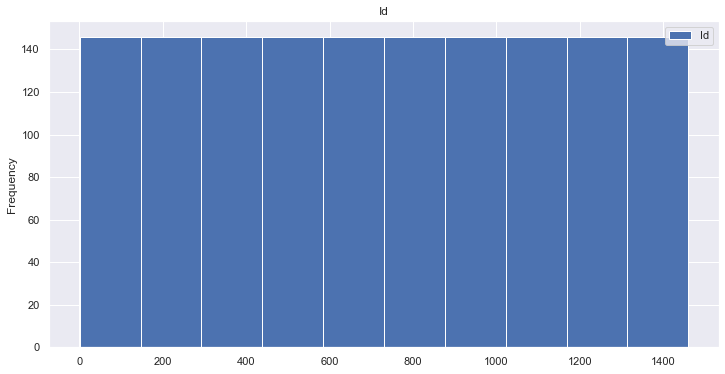

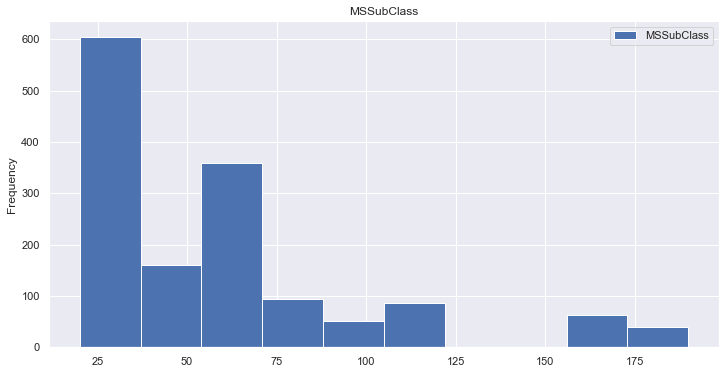

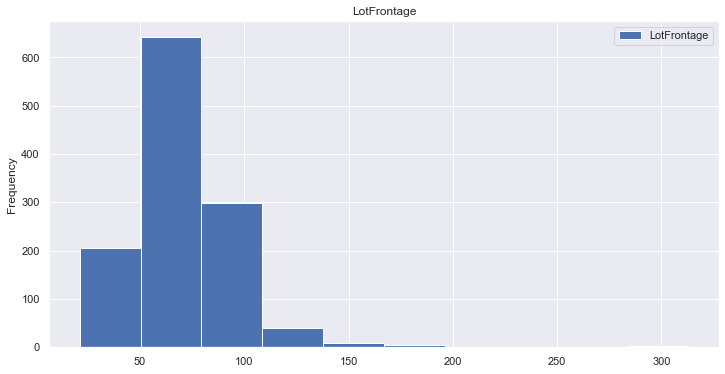

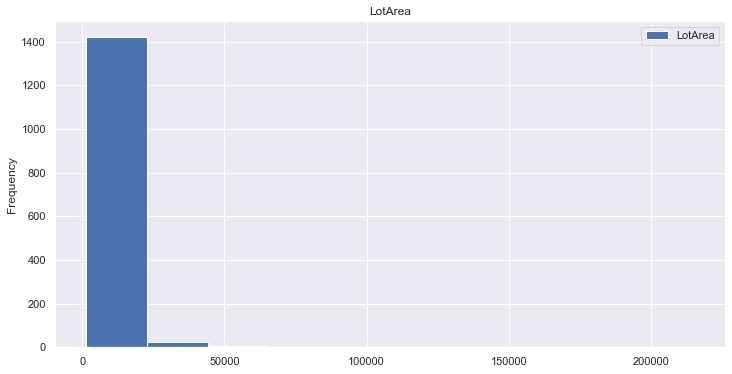

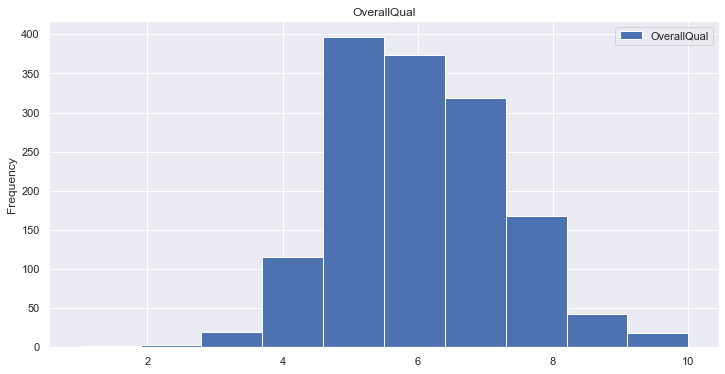

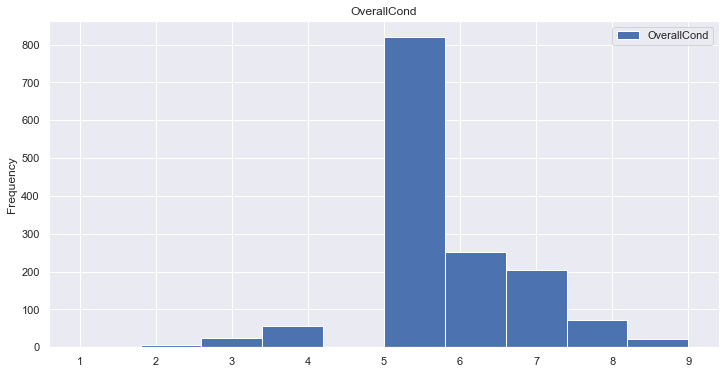

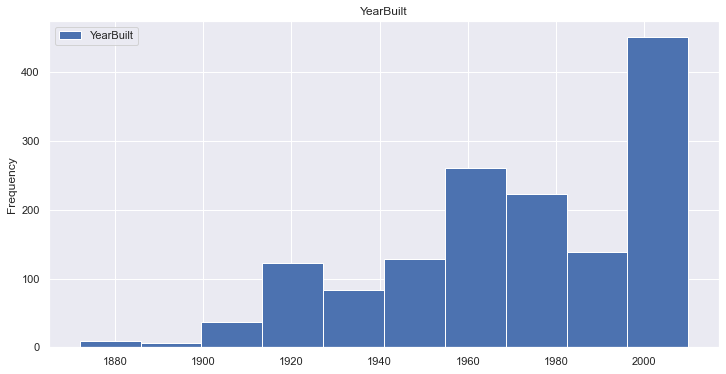

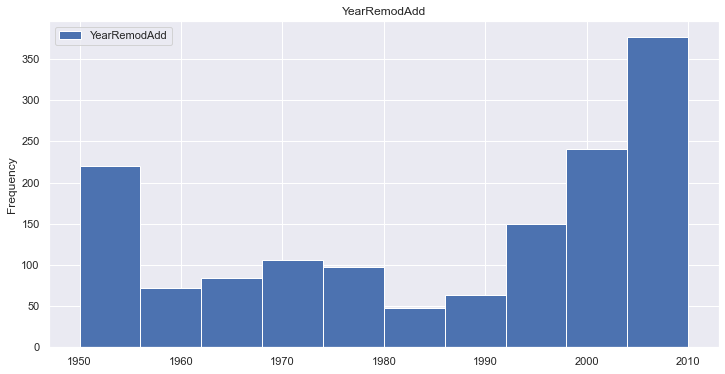

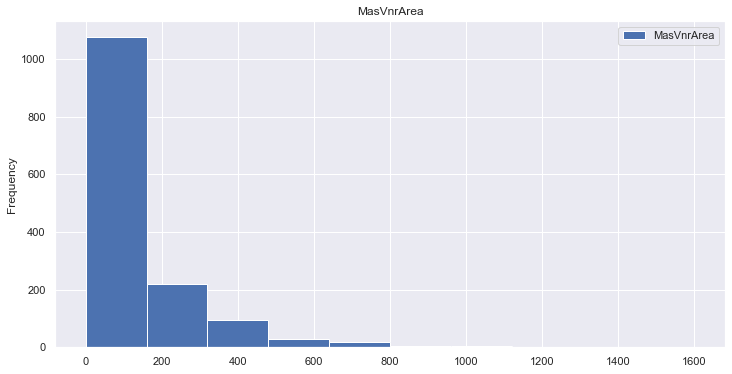

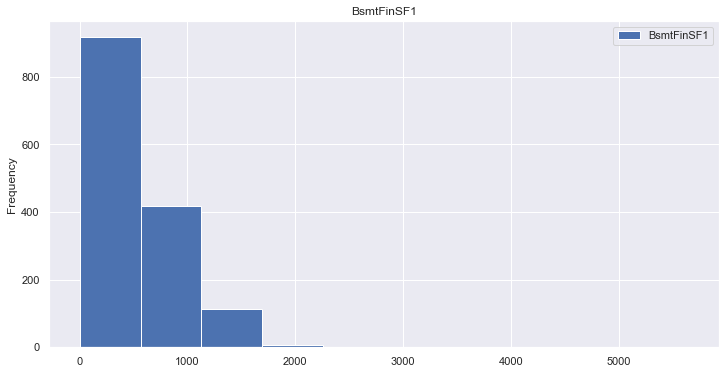

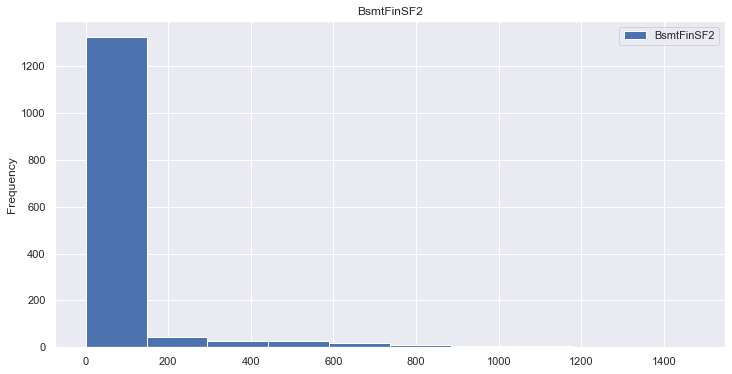

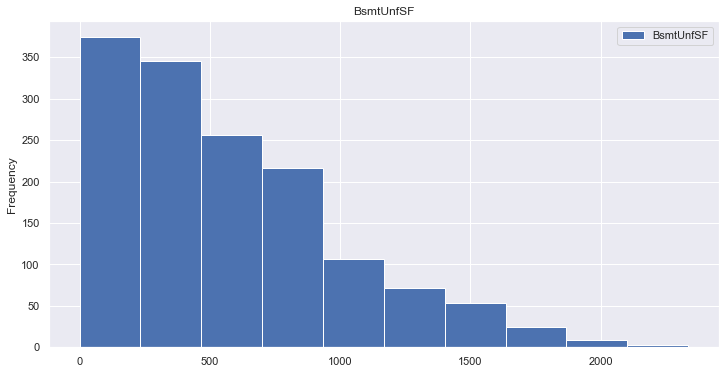

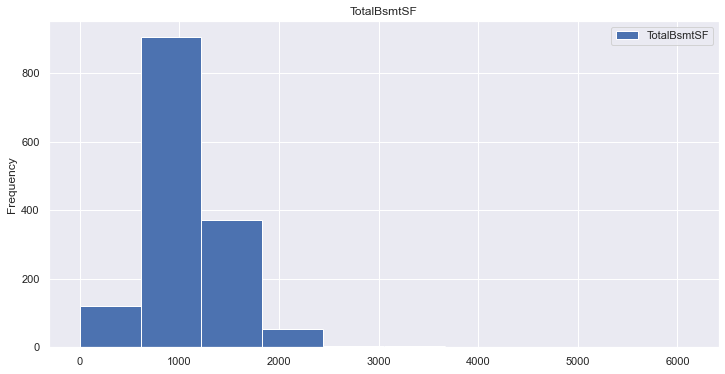

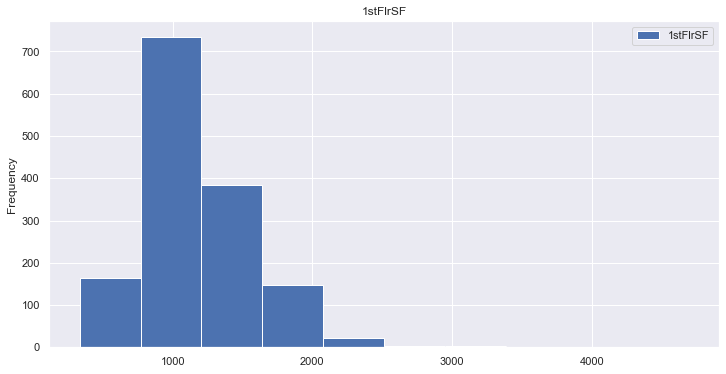

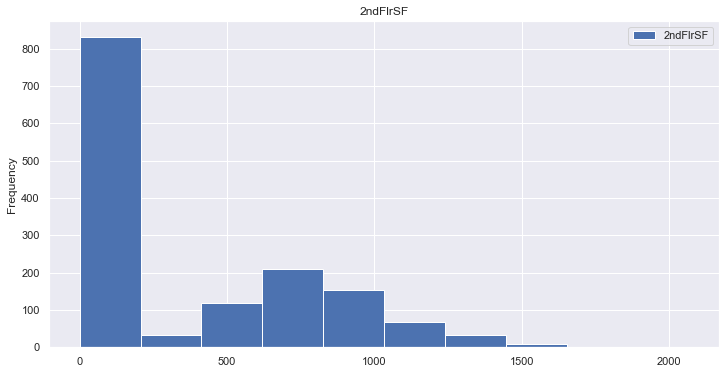

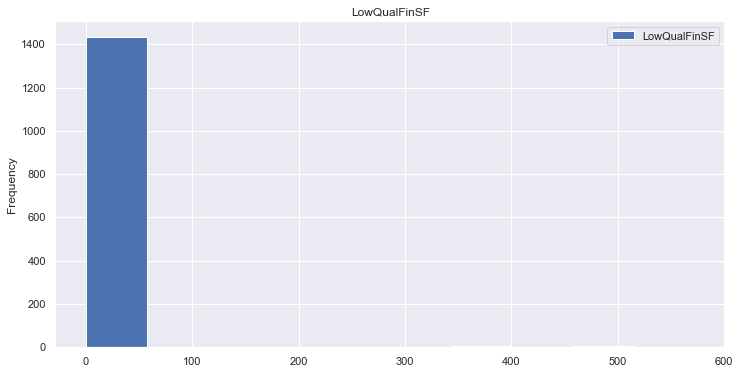

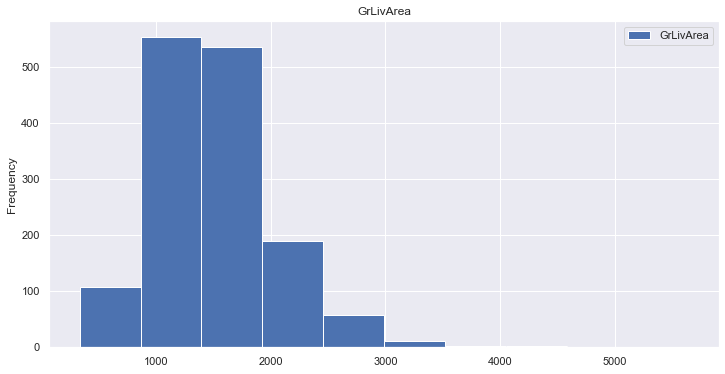

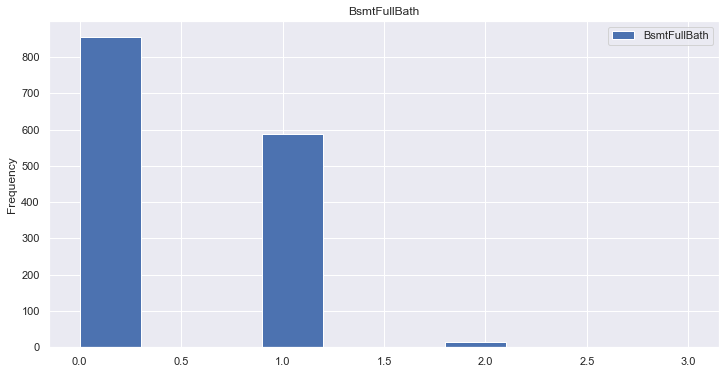

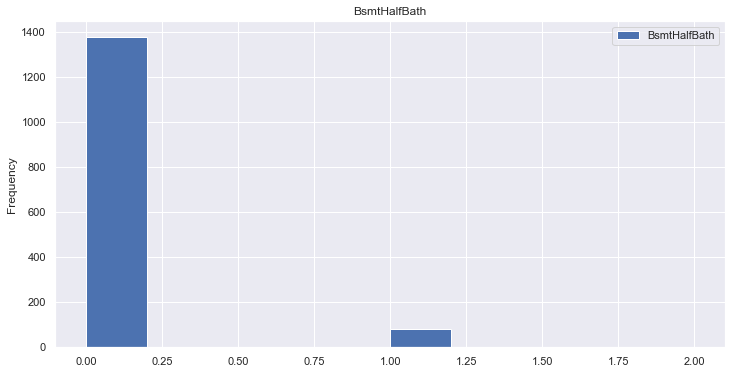

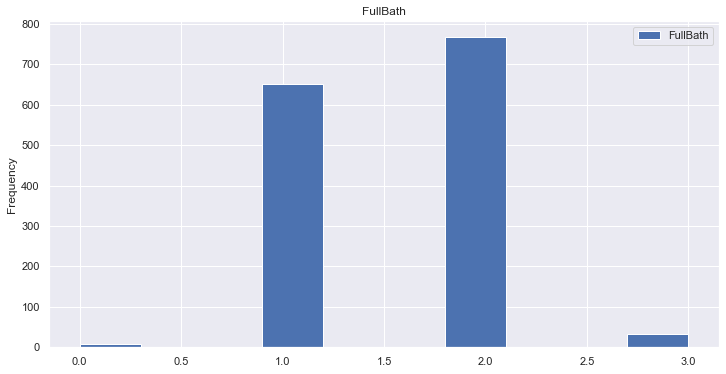

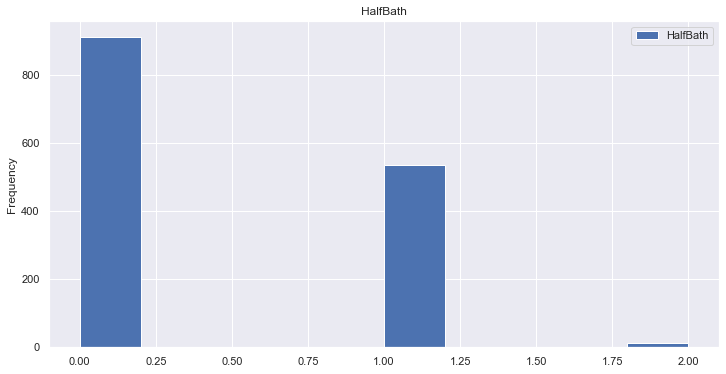

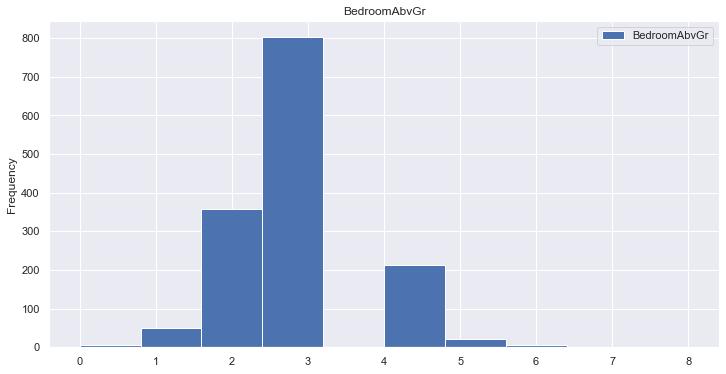

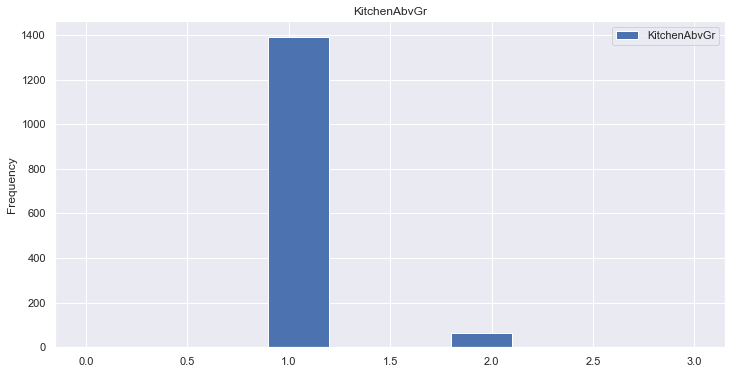

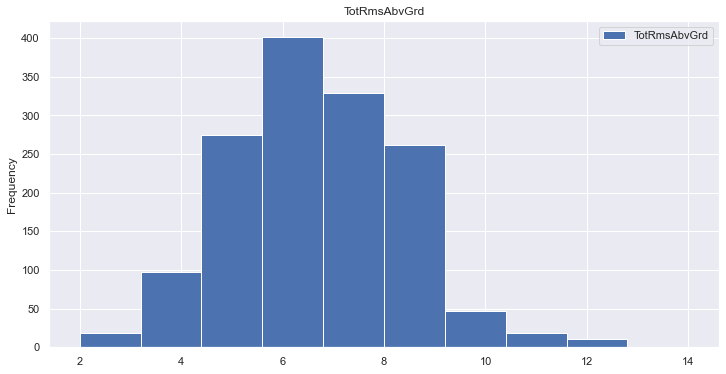

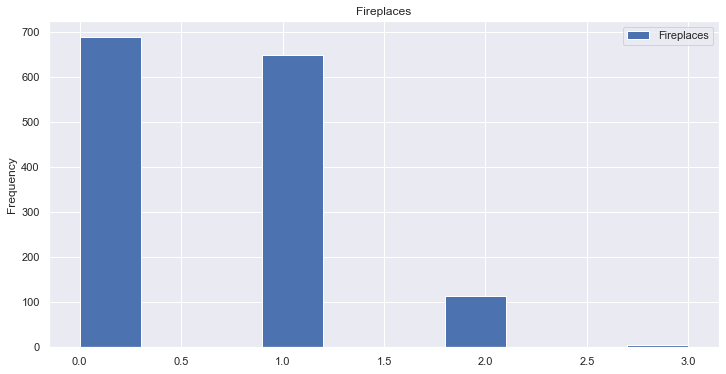

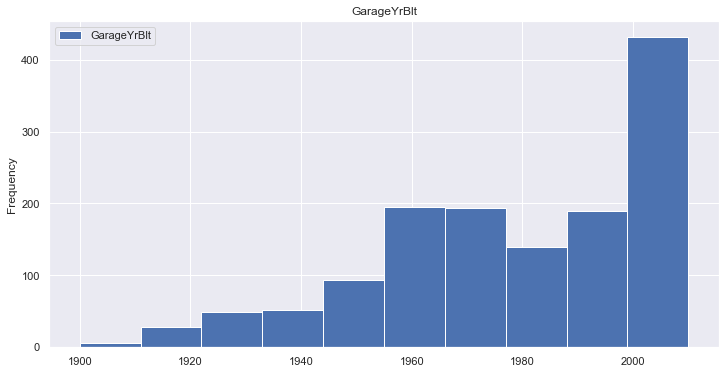

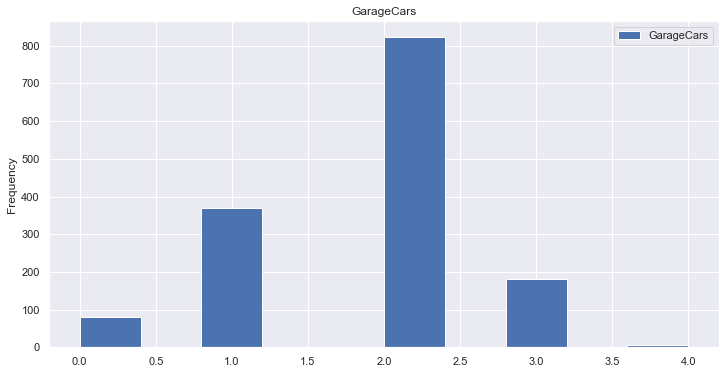

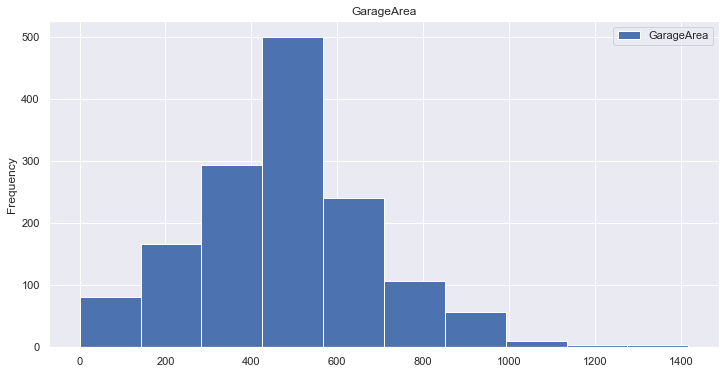

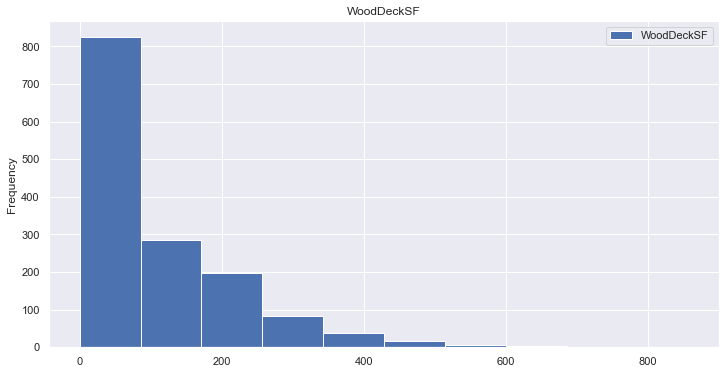

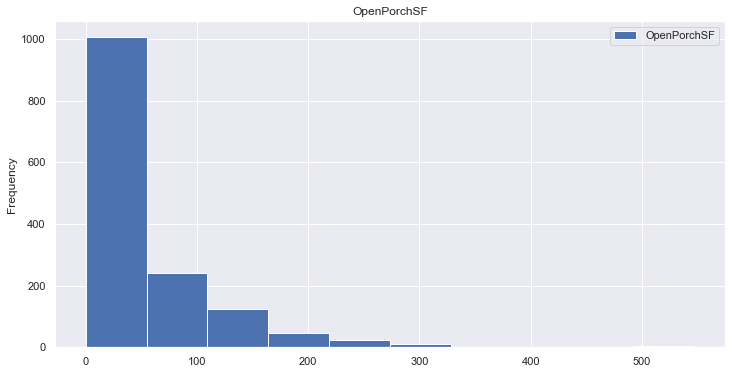

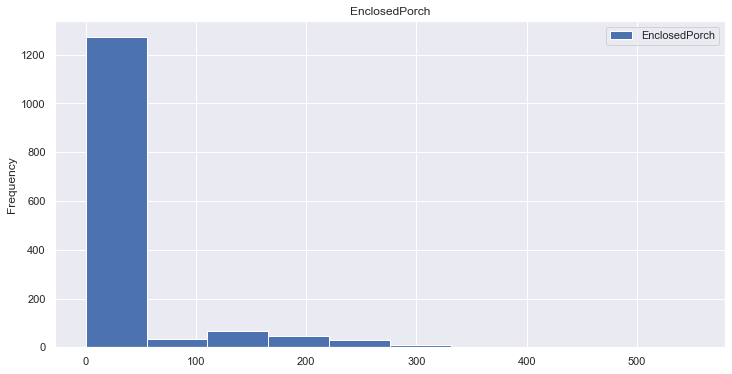

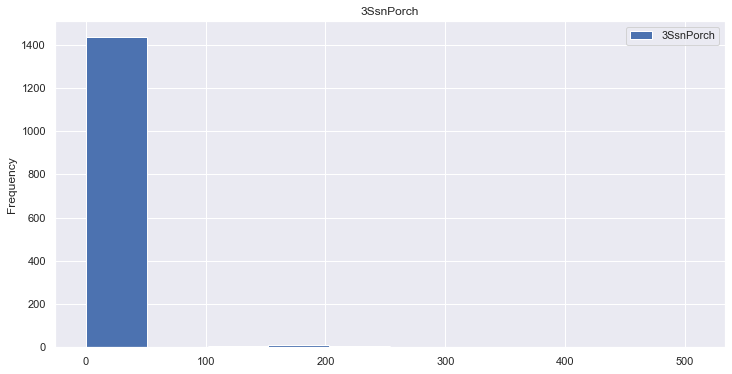

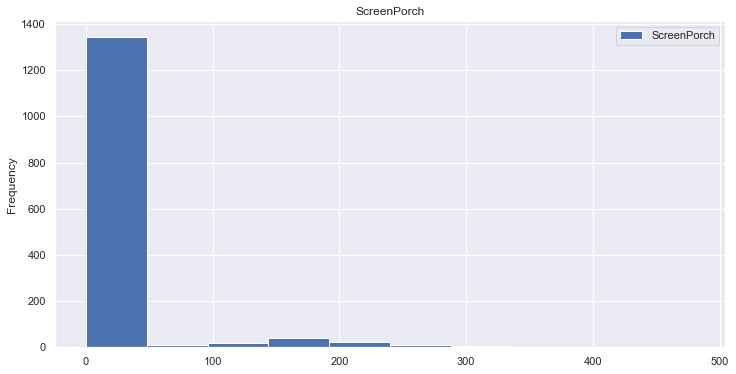

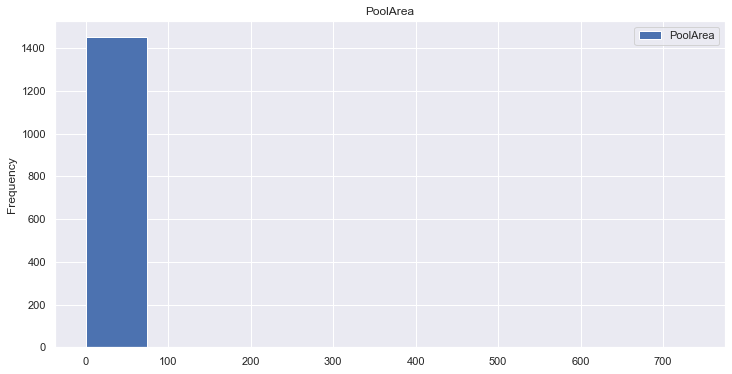

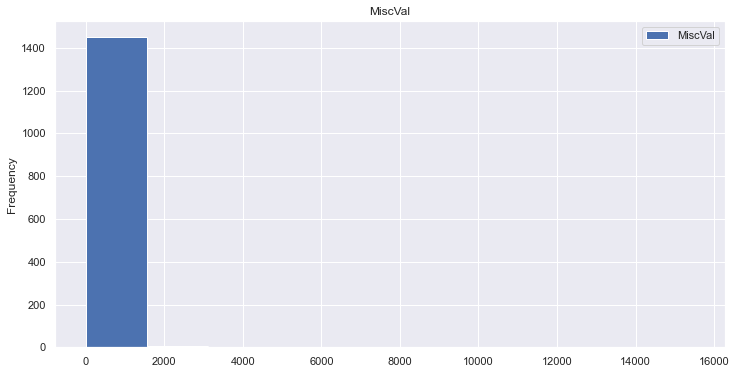

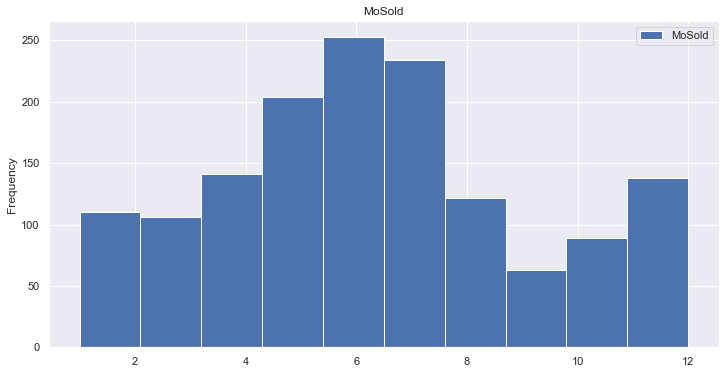

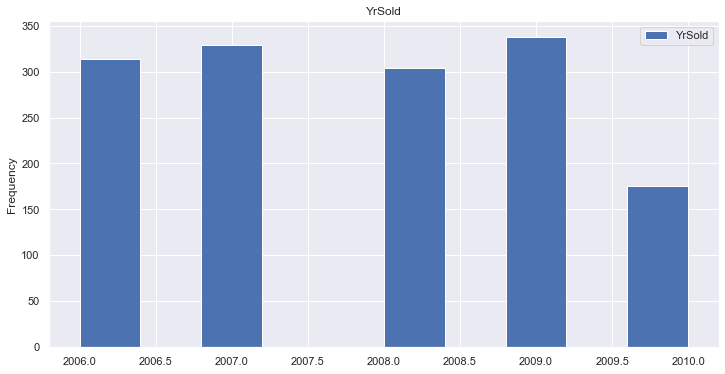

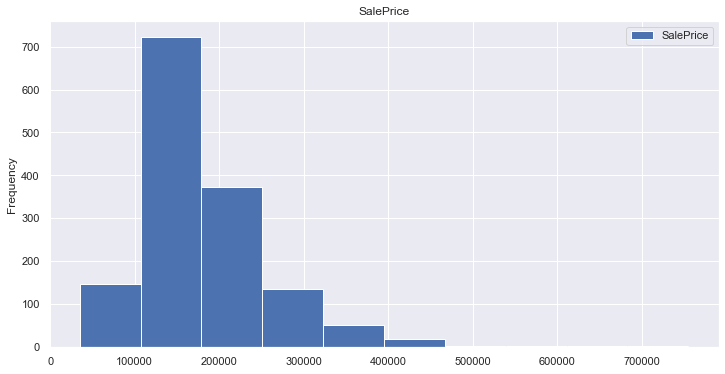

In [102]:
def showHist(data):
    columns = data.columns
    for i in columns:
        df = pd.DataFrame(data[i])
        df.plot(kind="hist", title=i, figsize=(12, 6))
showHist(numerical)

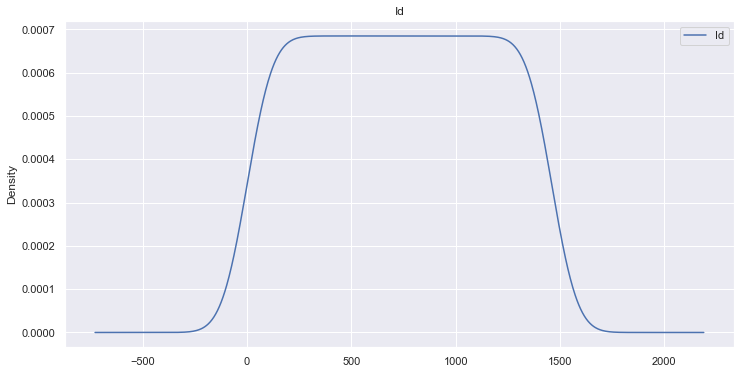

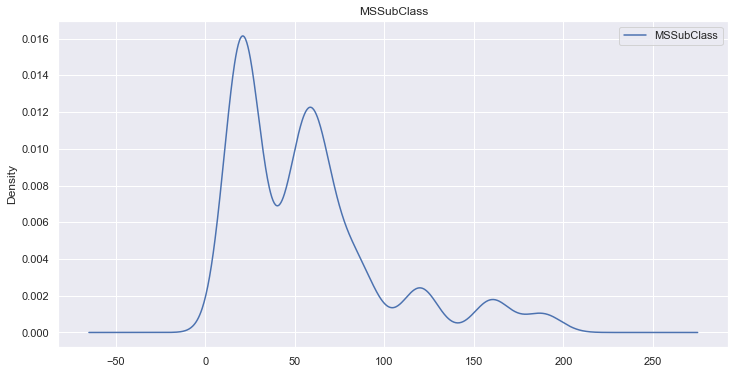

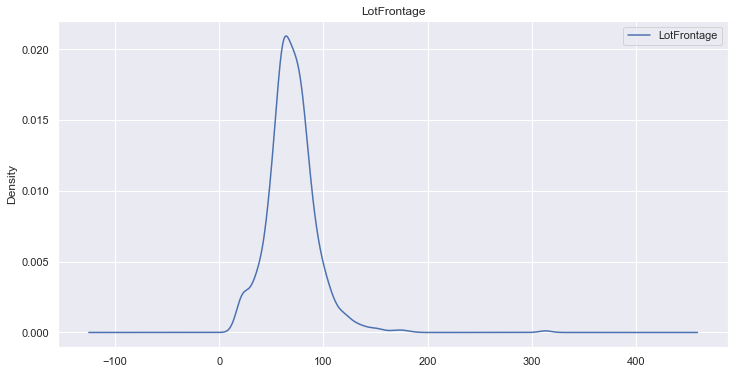

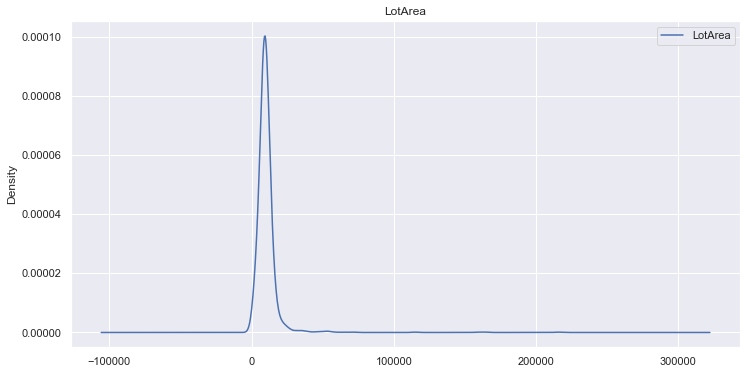

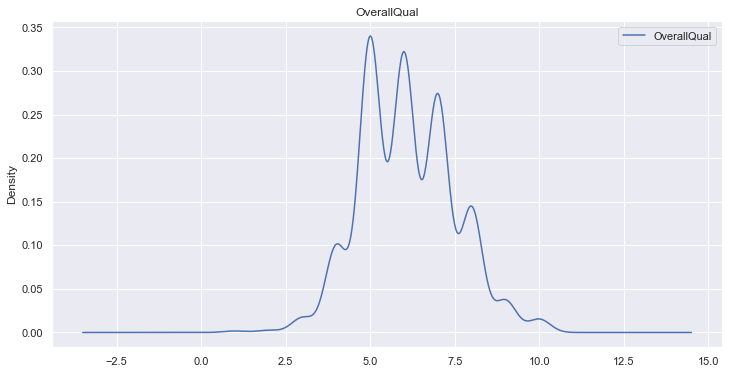

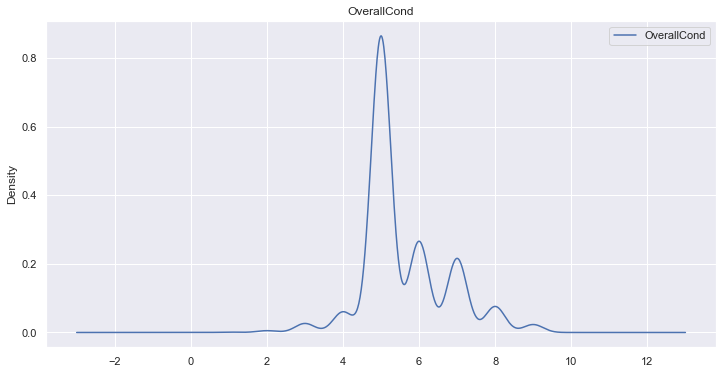

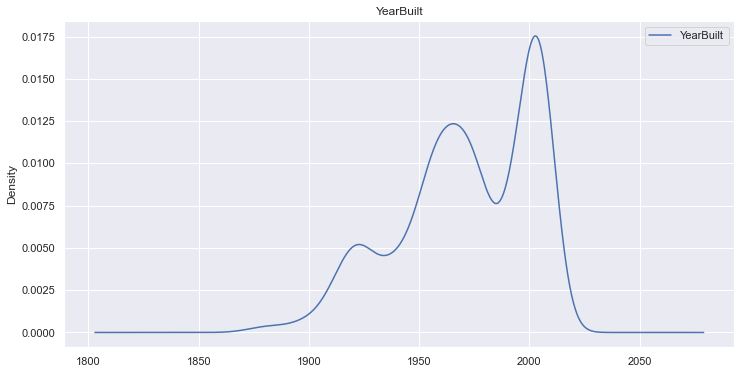

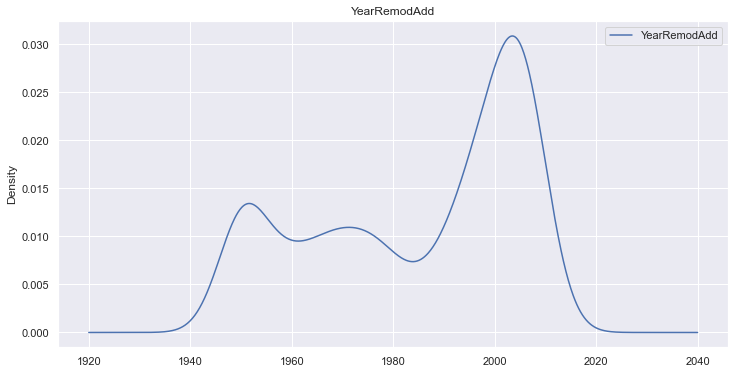

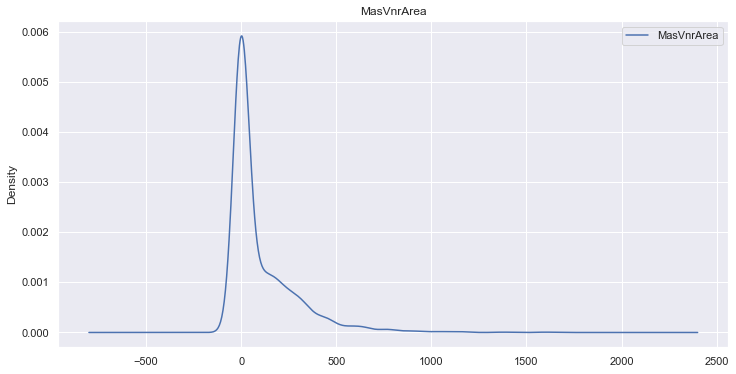

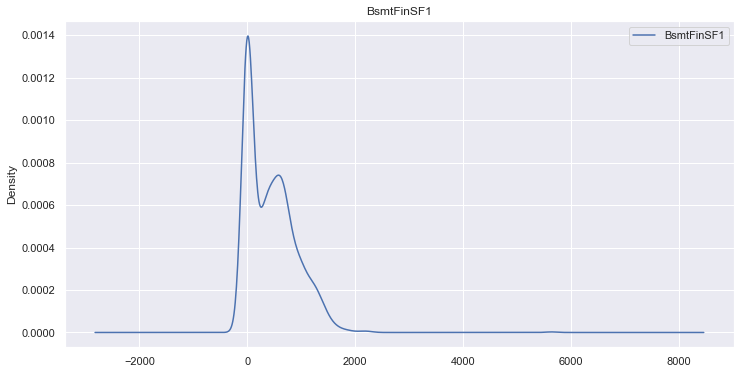

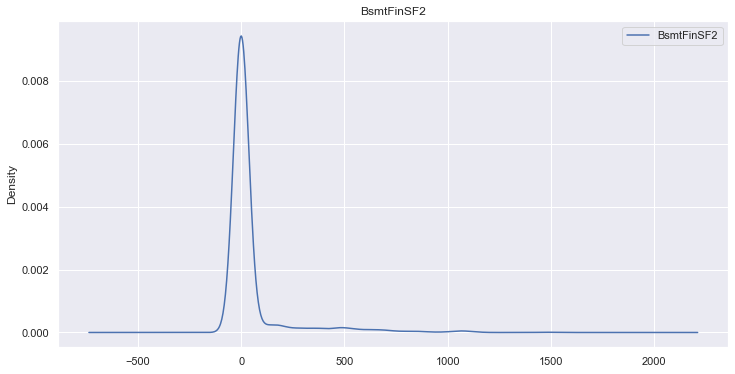

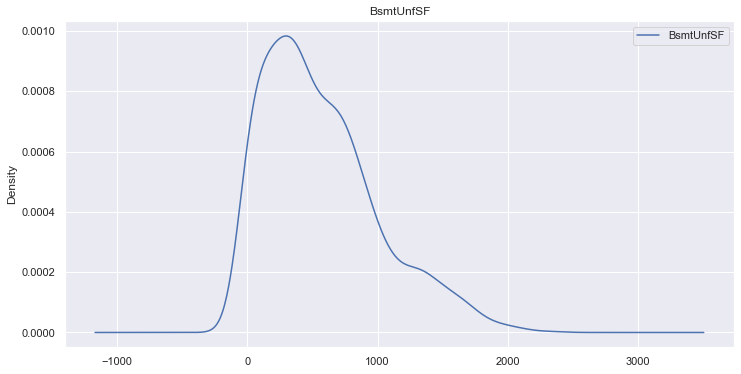

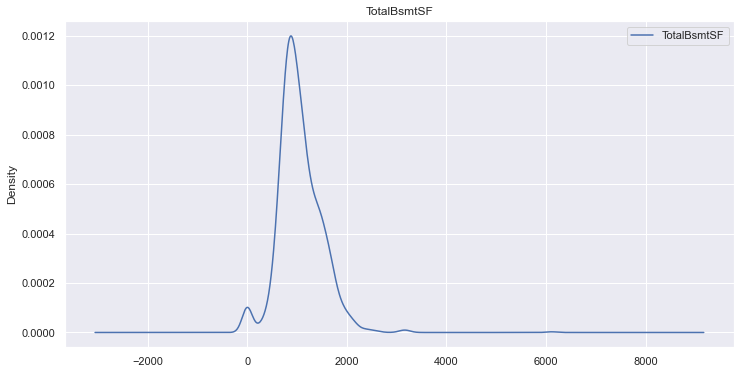

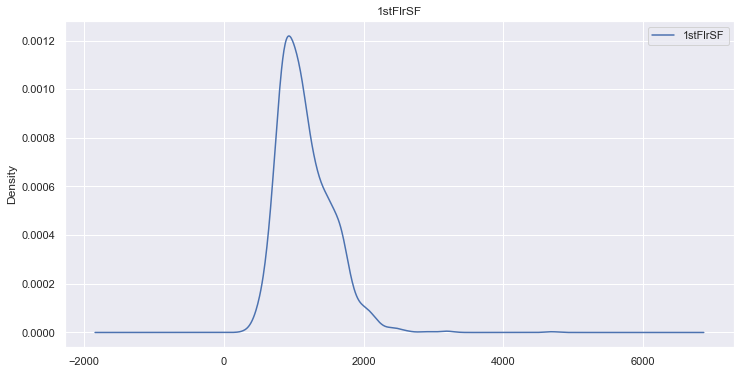

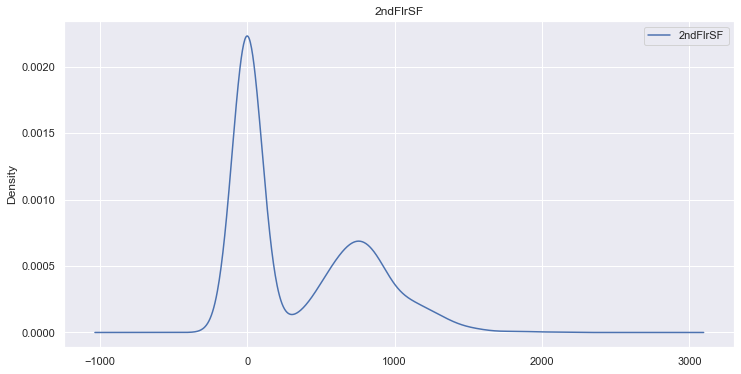

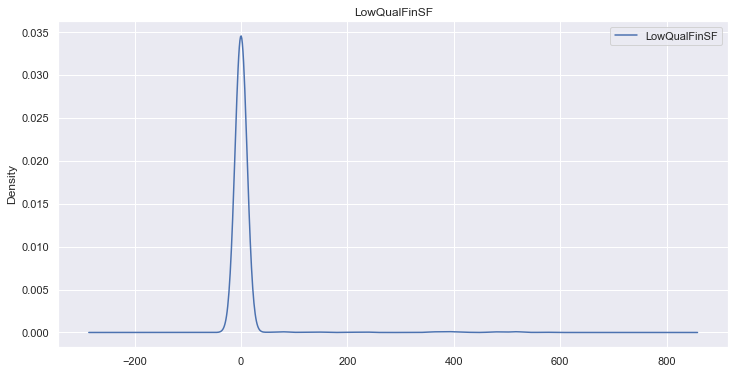

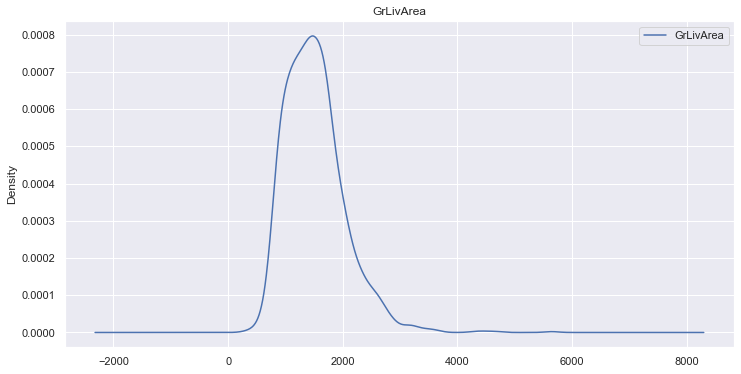

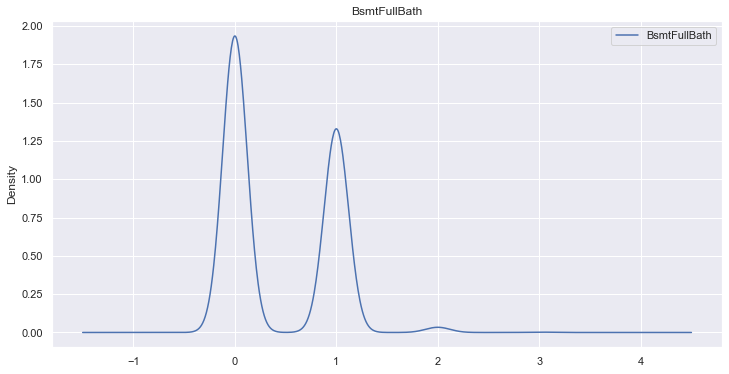

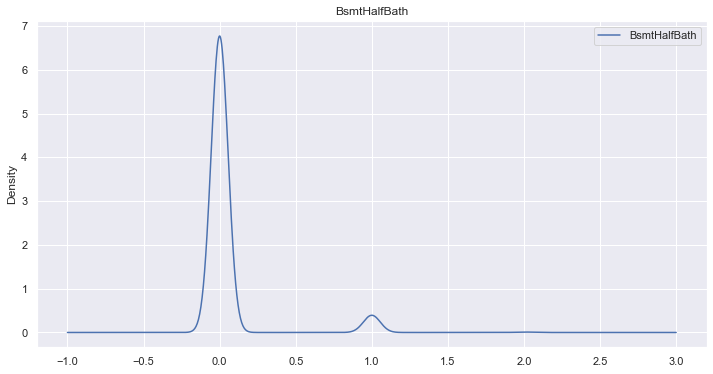

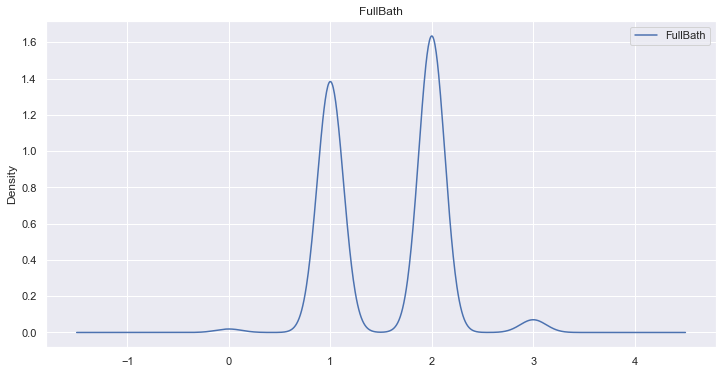

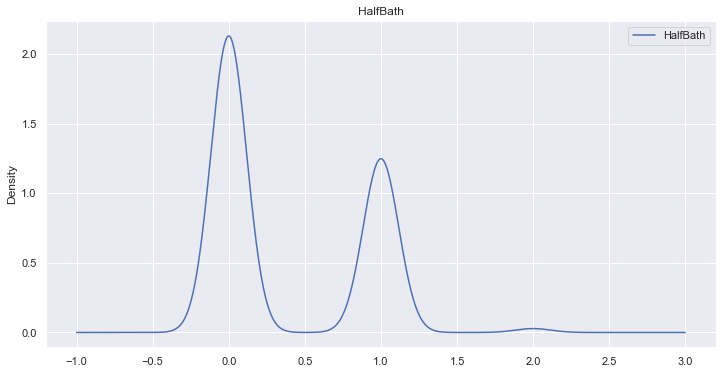

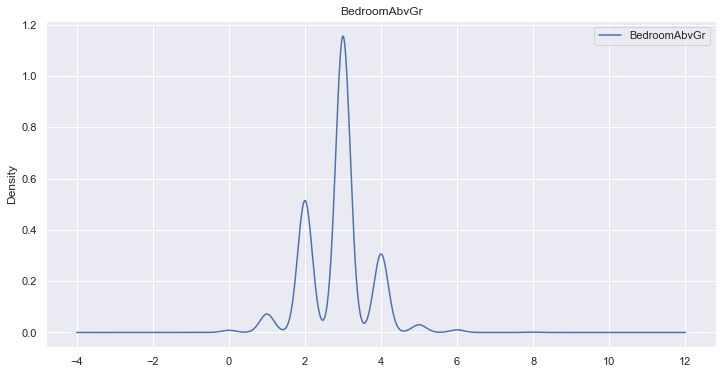

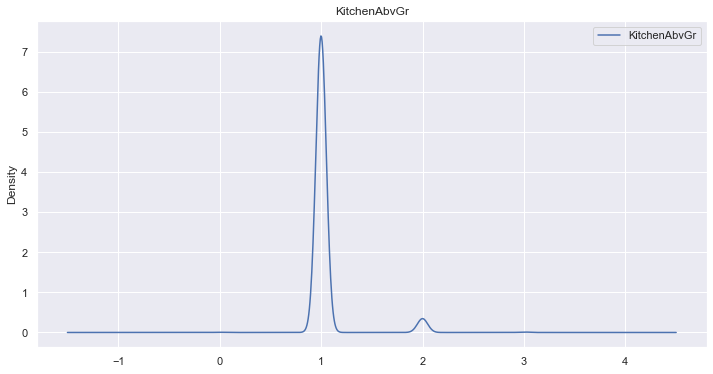

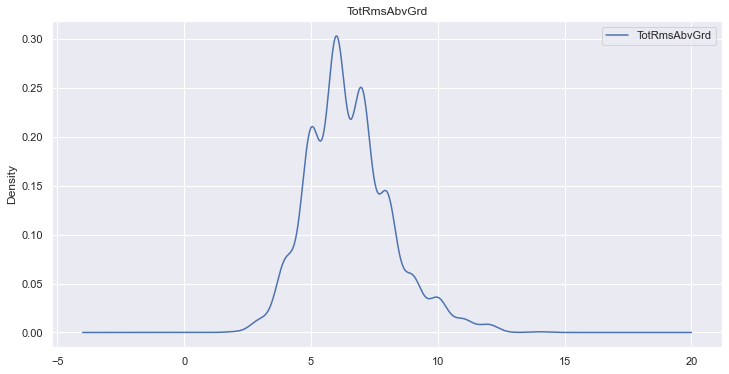

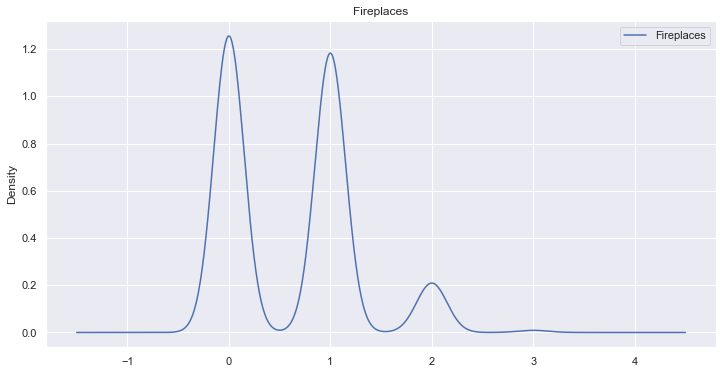

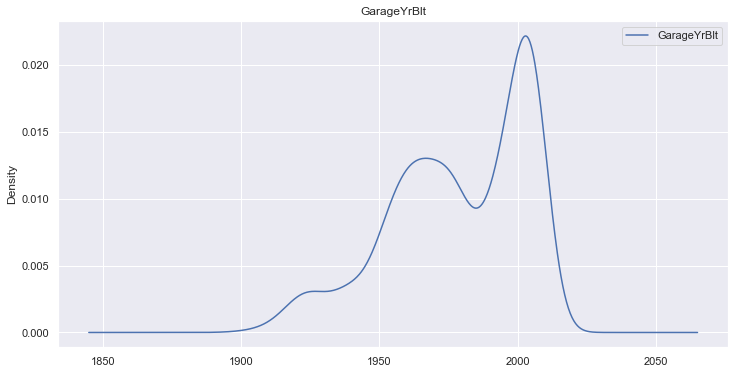

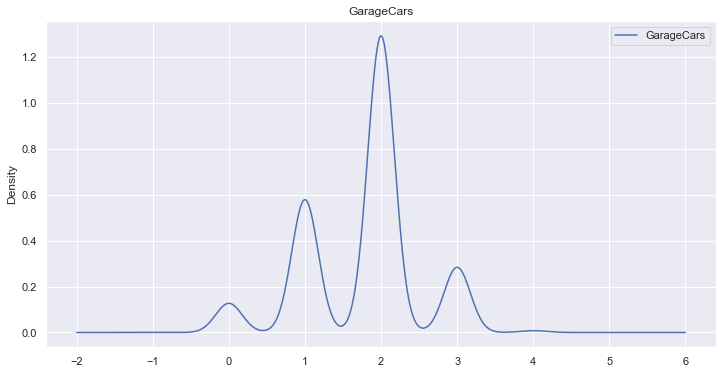

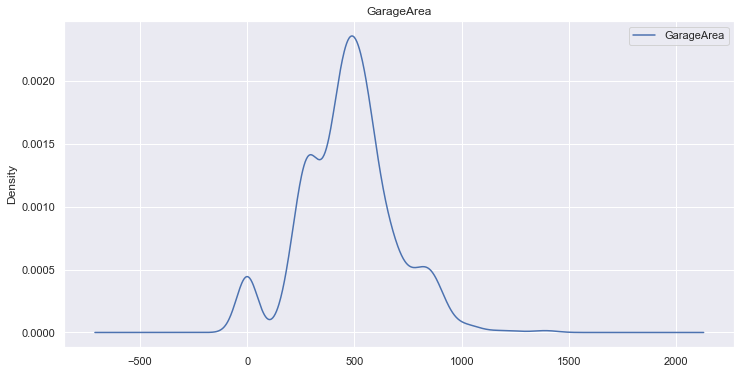

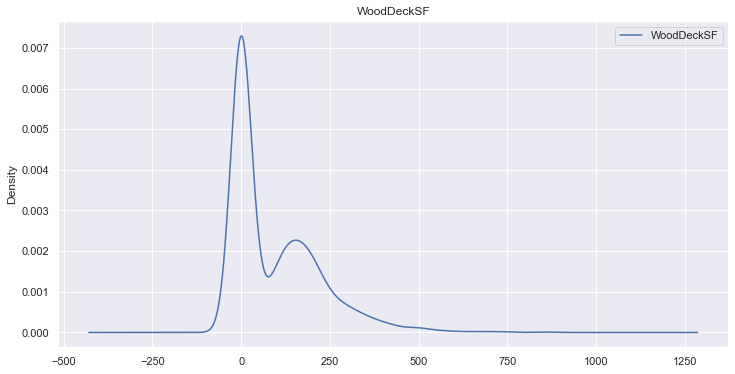

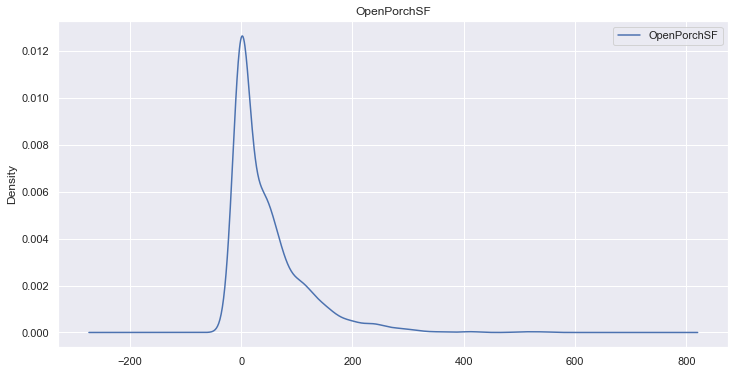

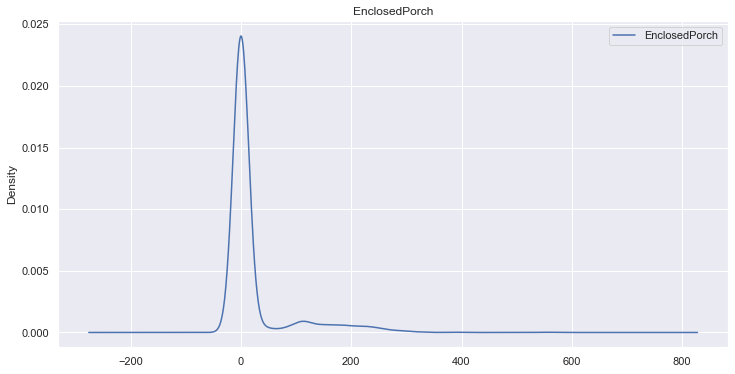

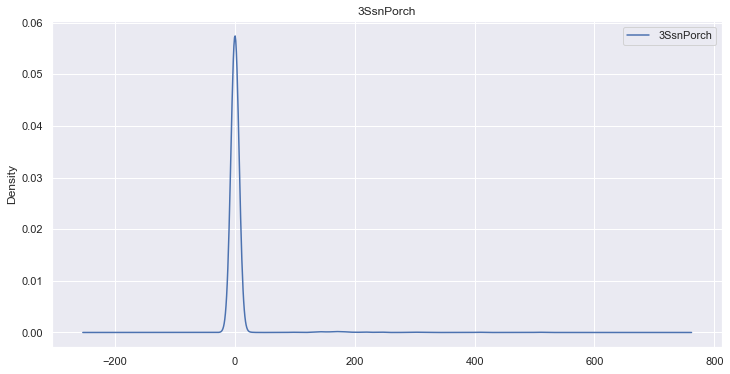

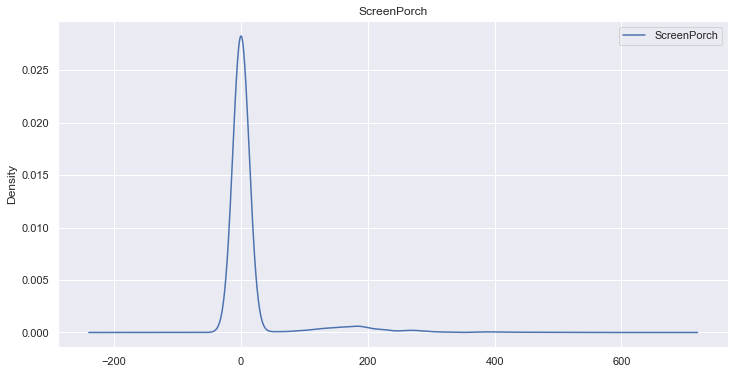

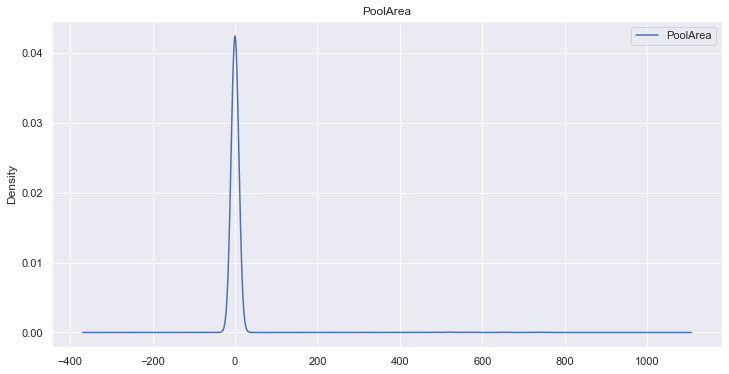

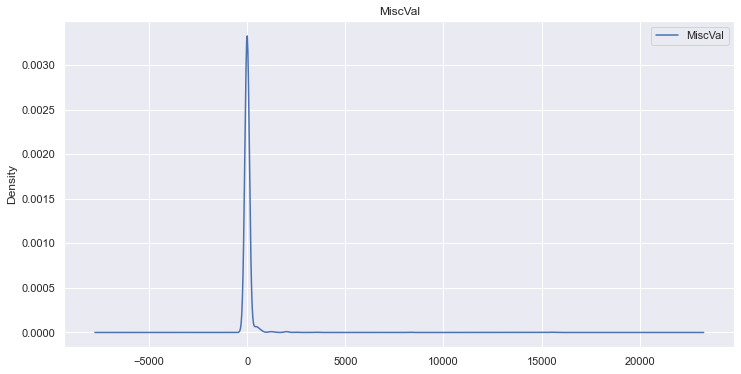

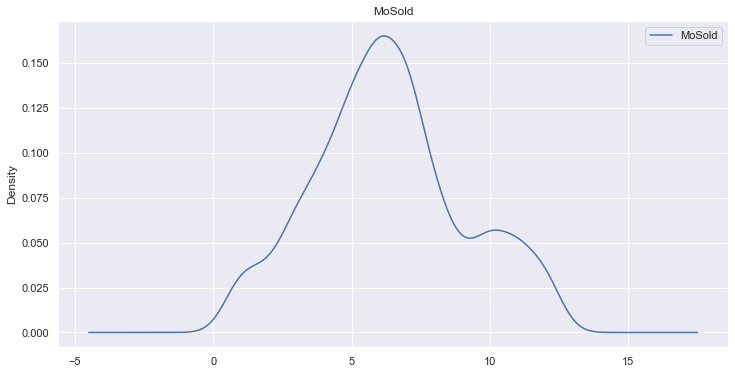

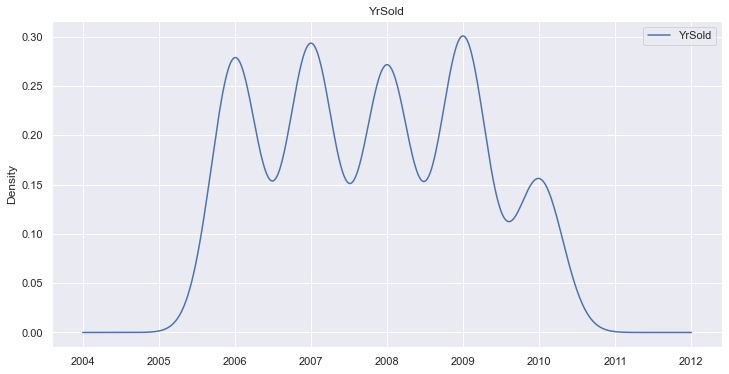

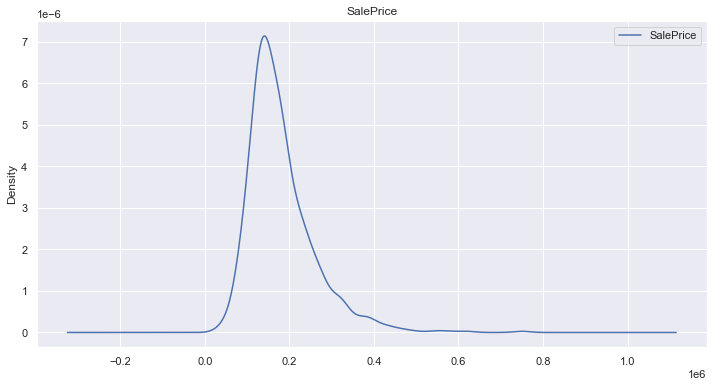

In [133]:
def showKDE(data):
    columns = data.columns
    for i in columns:
        df = pd.DataFrame(data[i])
        df.plot(kind="density", title=i, figsize=(12, 6))
showKDE(numerical)

In [104]:
print(numerical.corr())

                     Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.010601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.386347 -0.139781     0.032628   
LotFrontage   -0.010601   -0.386347     1.000000  0.426095     0.251646   
LotArea       -0.033226   -0.139781     0.426095  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.251646  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.059213 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.123349  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.088866  0.013788     0.550684   
MasVnrArea    -0.050298    0.022936     0.193458  0.104160     0.411876   
BsmtFinSF1    -0.005024   -0.069836     0.233633  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.049900  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.132644 -0.002618     0.308159   
TotalBsmtSF   -0.015415  

<AxesSubplot:>

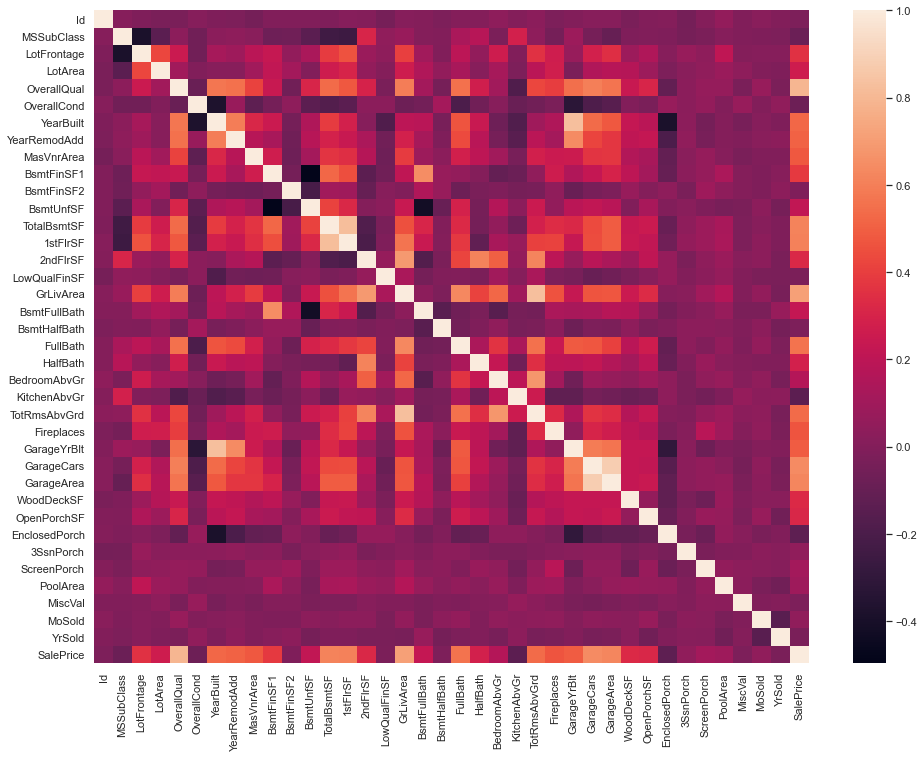

In [131]:
sns.set(rc={"figure.figsize":(16, 12)}) 
sns.heatmap(numerical.corr())

### Categorical Data

In [105]:
def showBar(data):
    columns = data.columns
    for i in columns:
        feature = train.groupby(i).size()
        df = pd.DataFrame(feature)
        df.plot(kind="bar", stacked=False, figsize=(12, 6))

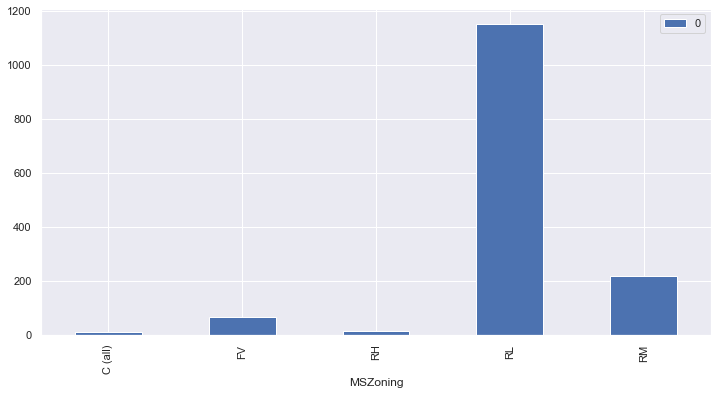

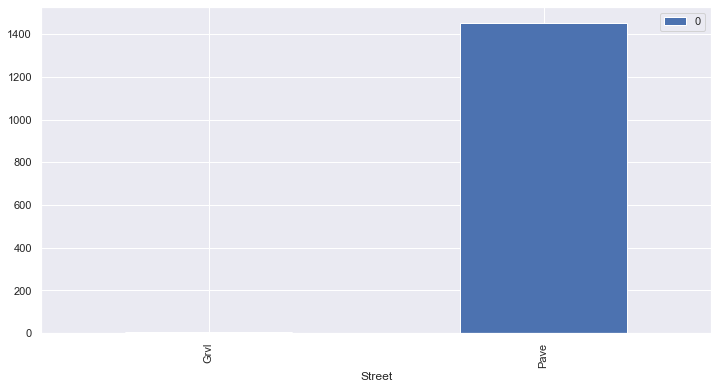

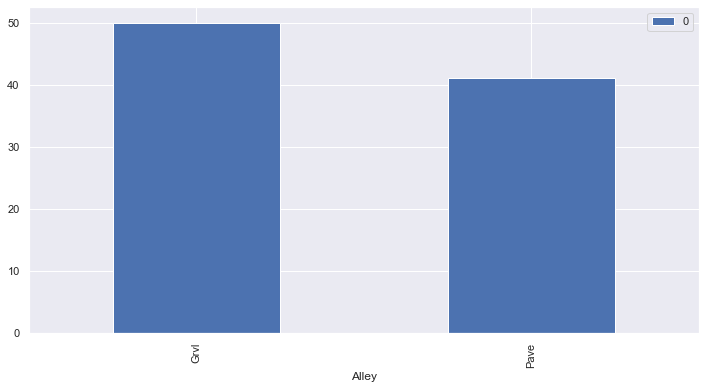

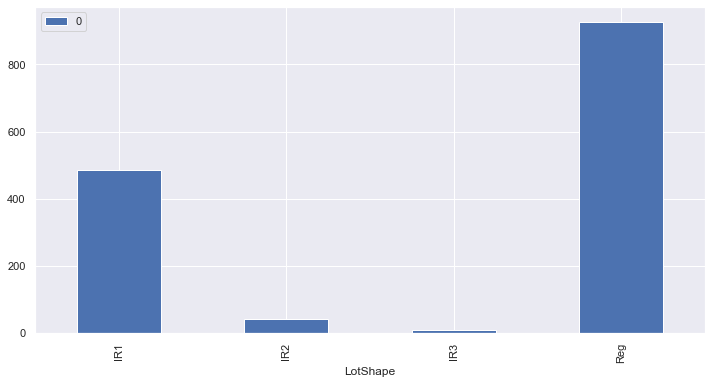

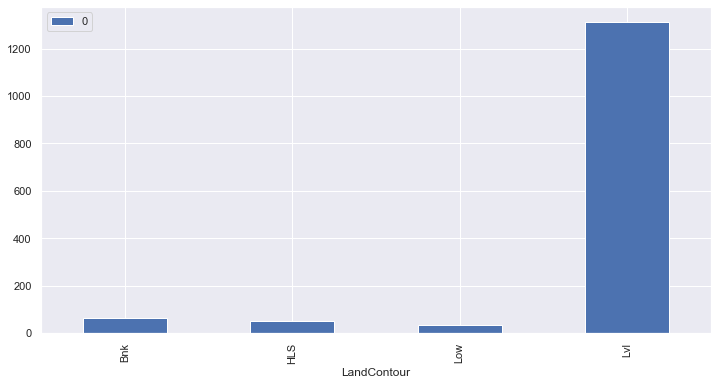

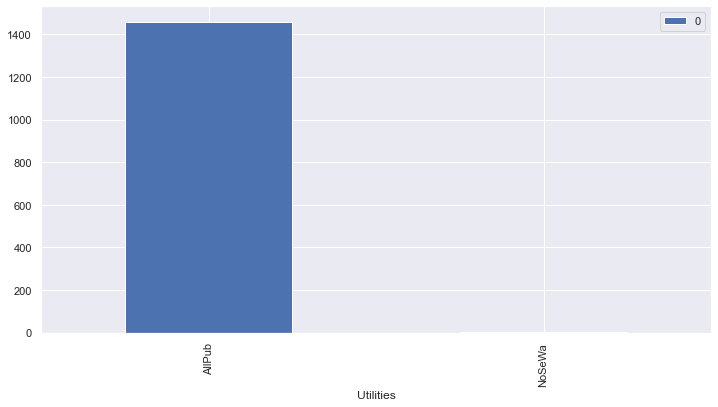

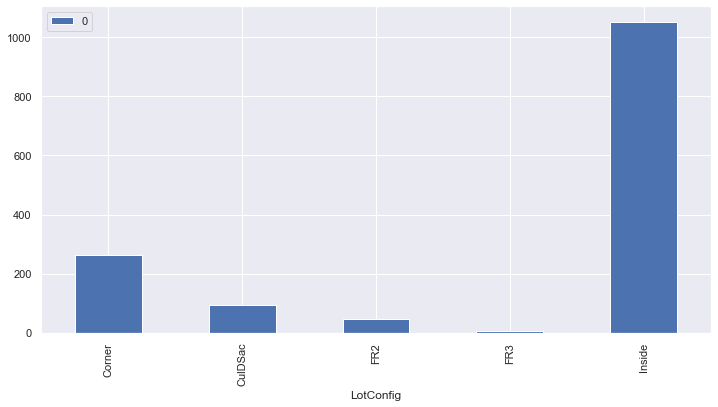

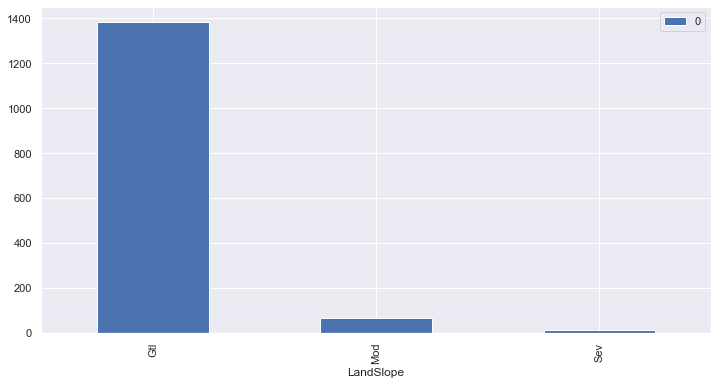

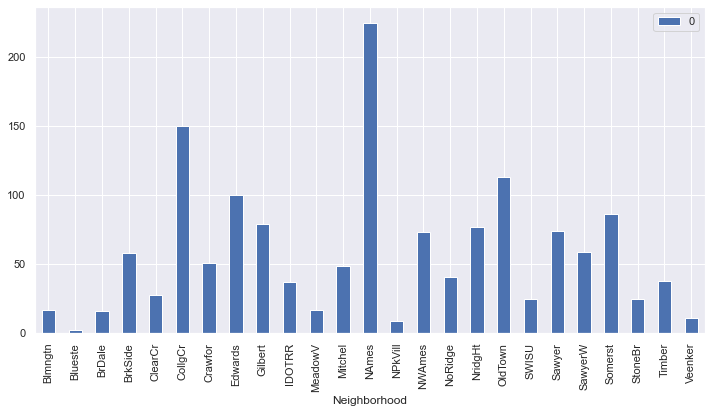

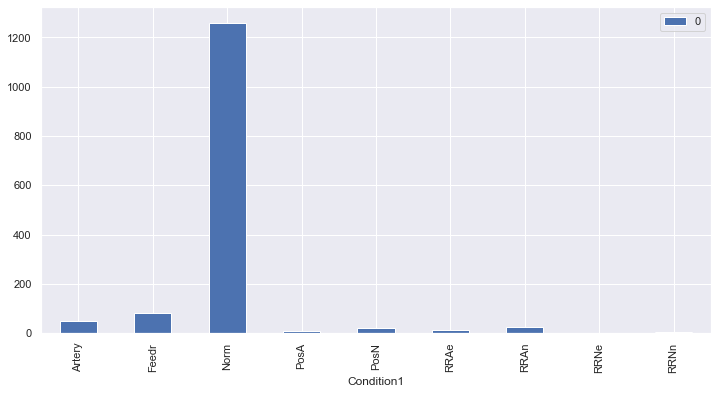

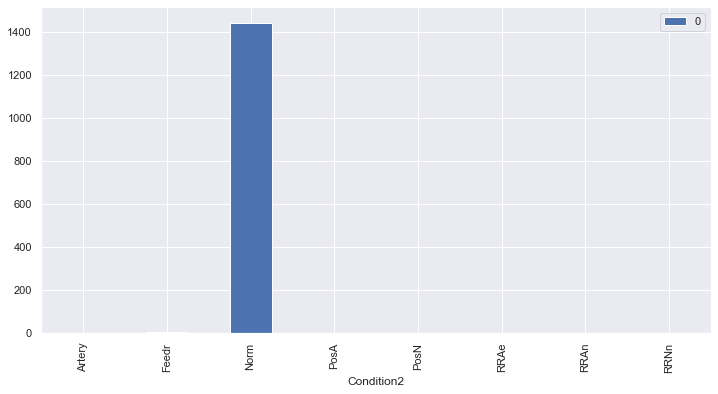

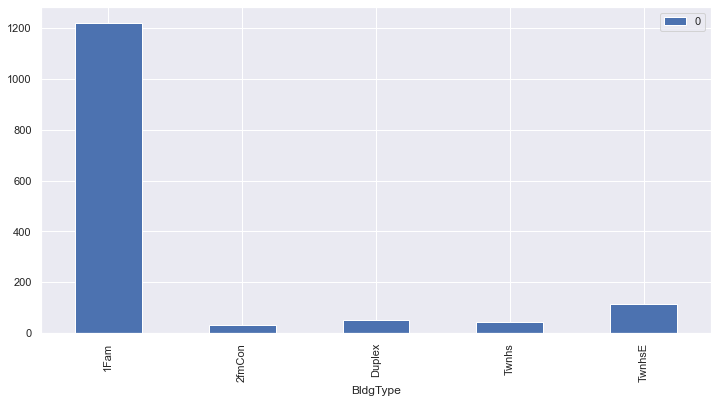

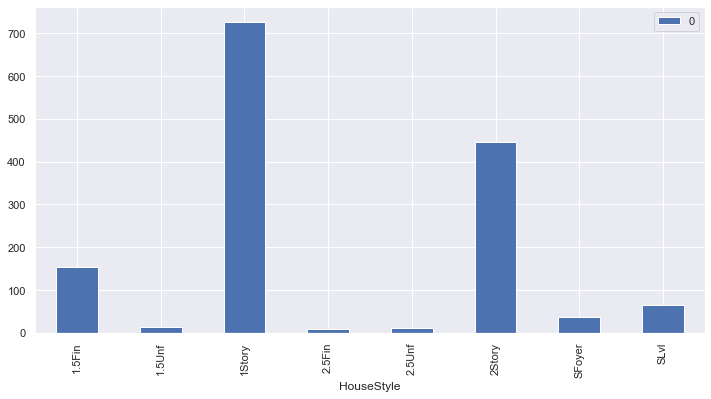

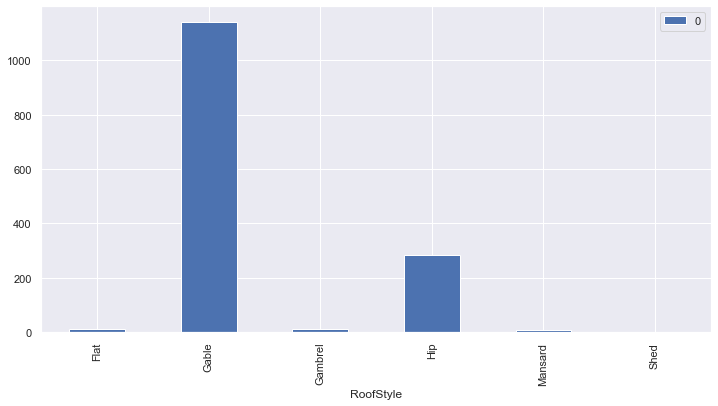

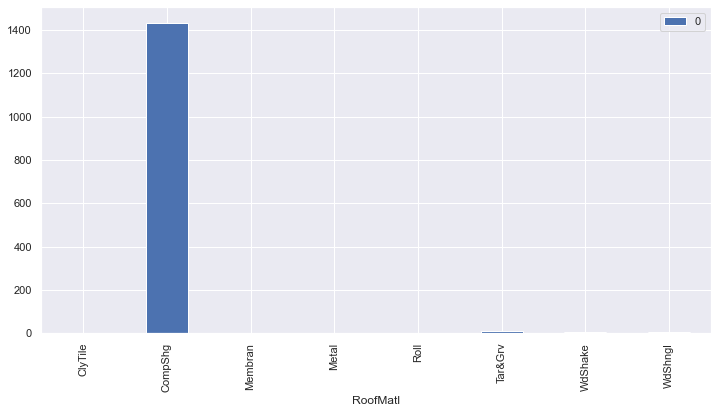

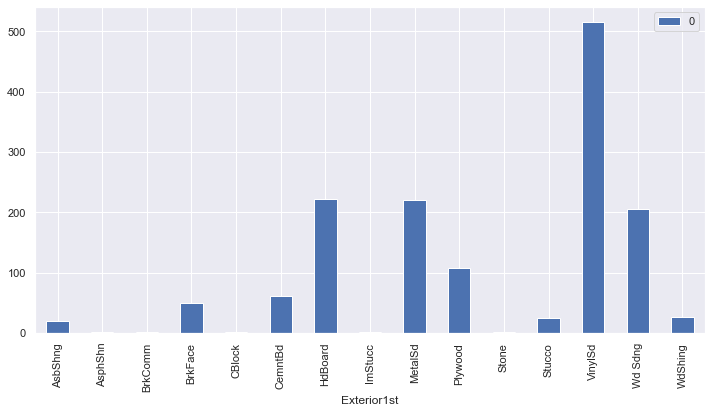

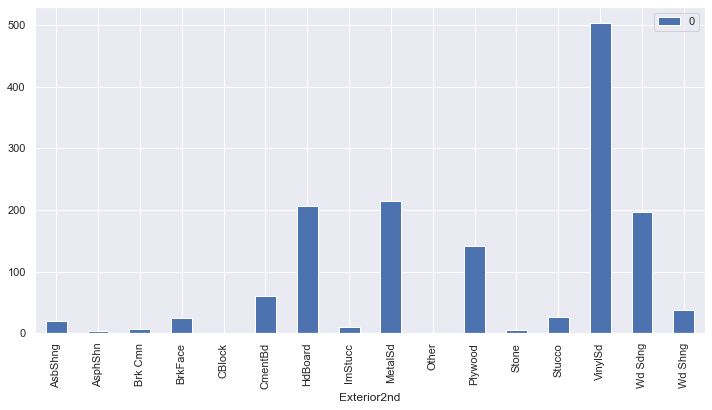

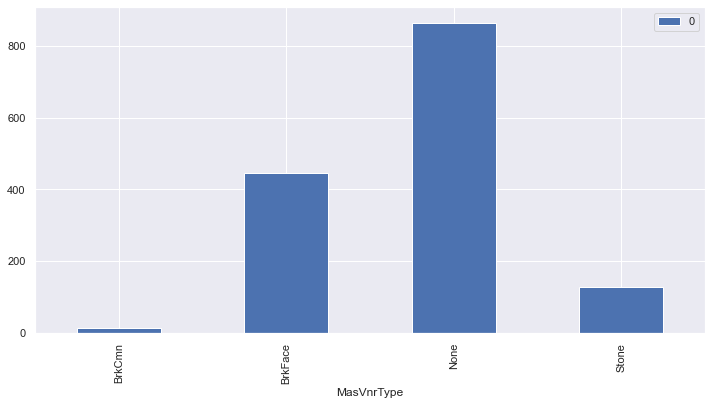

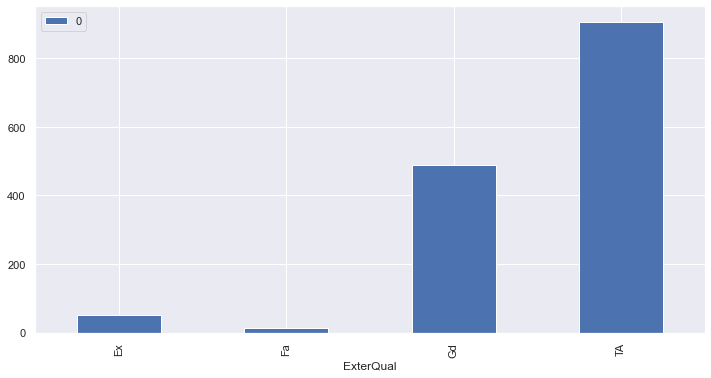

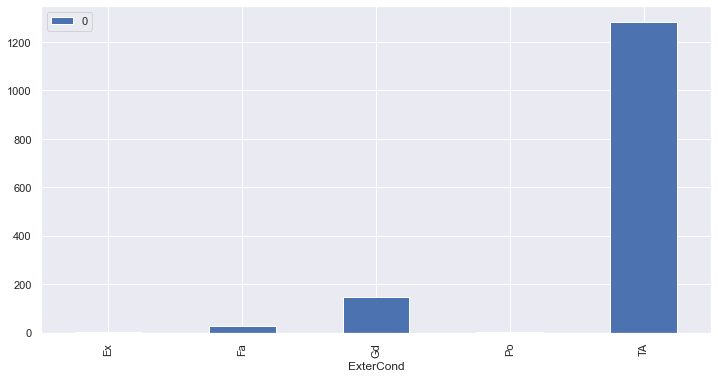

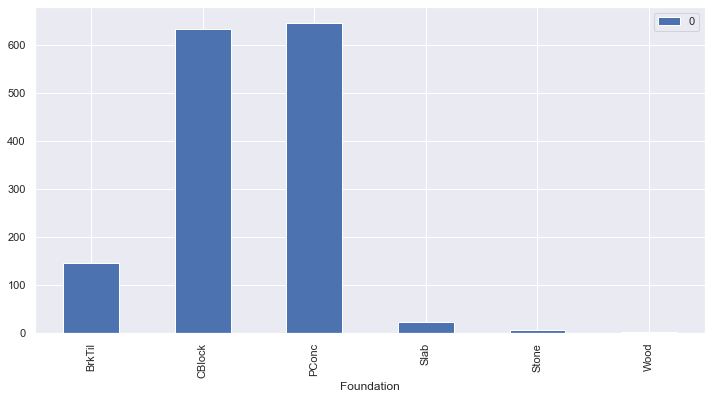

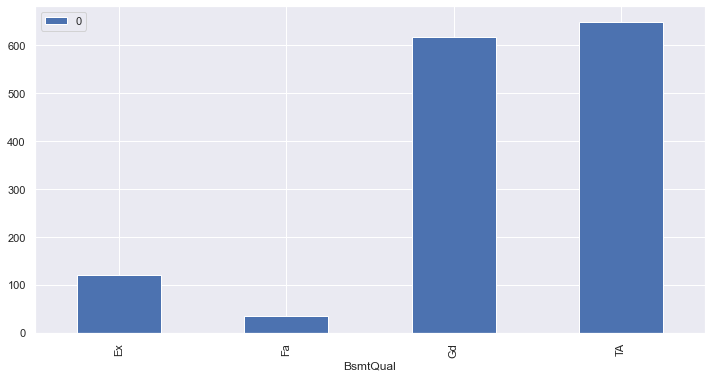

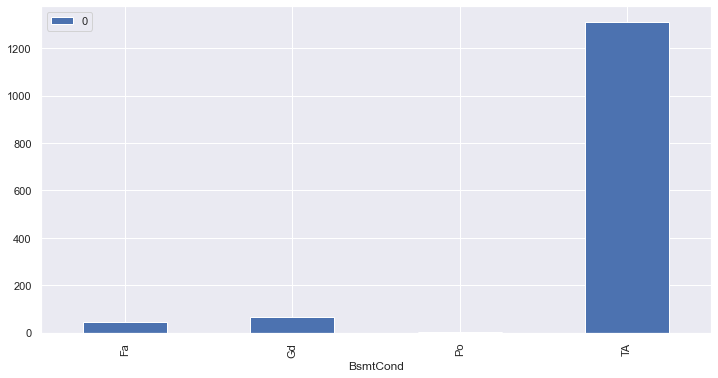

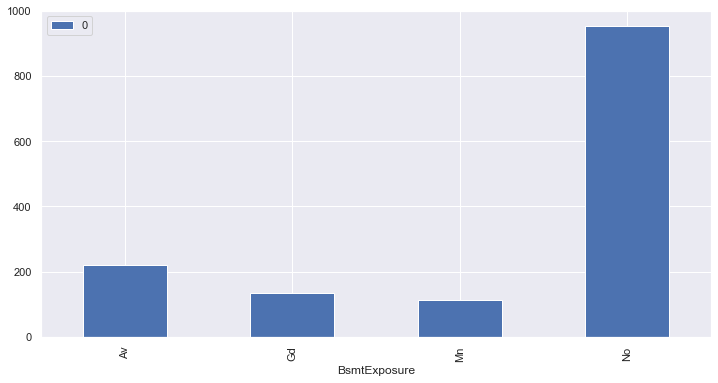

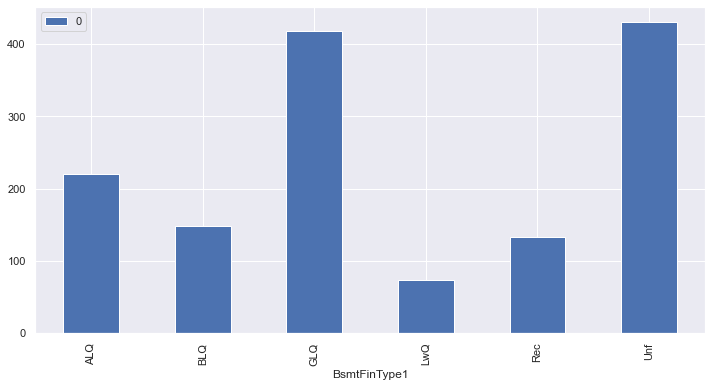

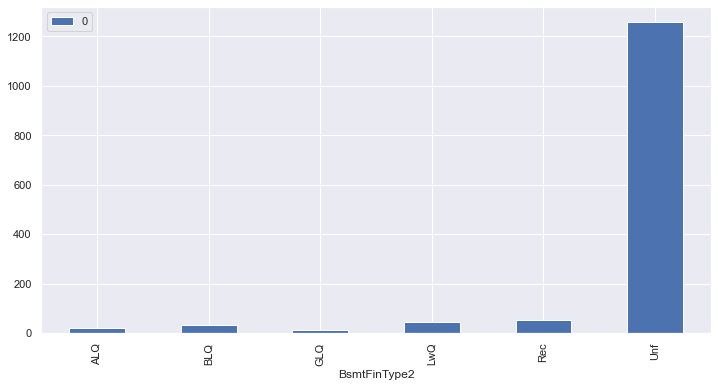

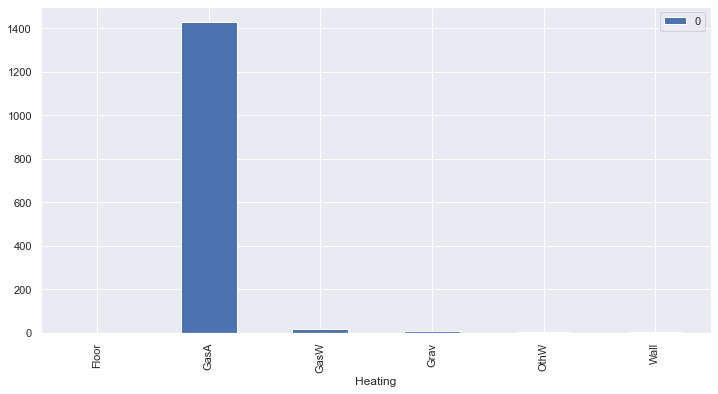

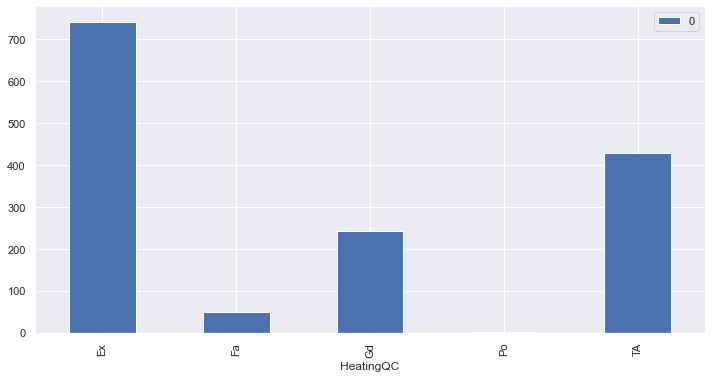

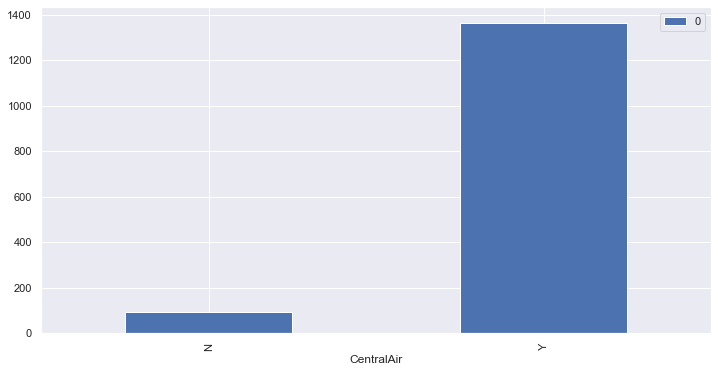

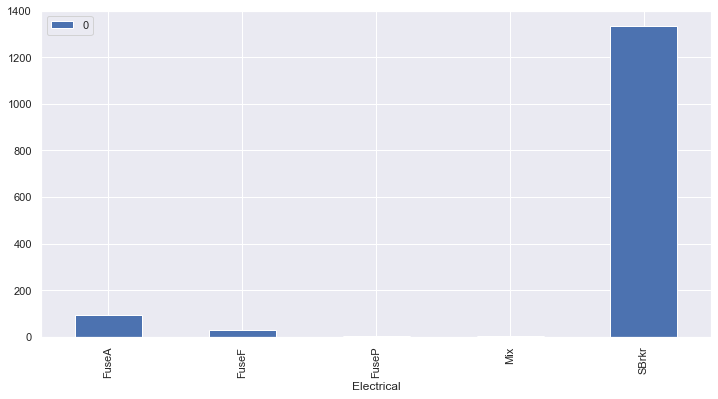

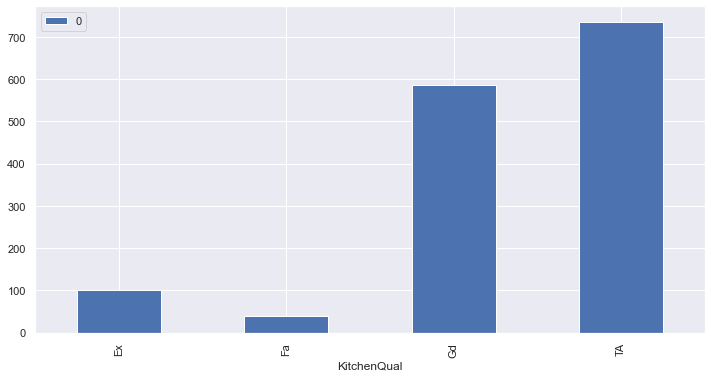

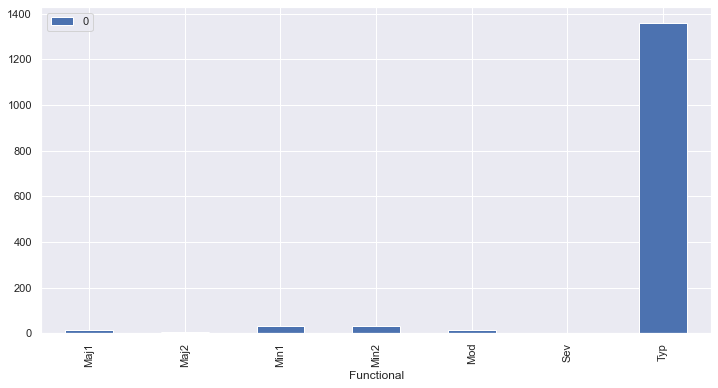

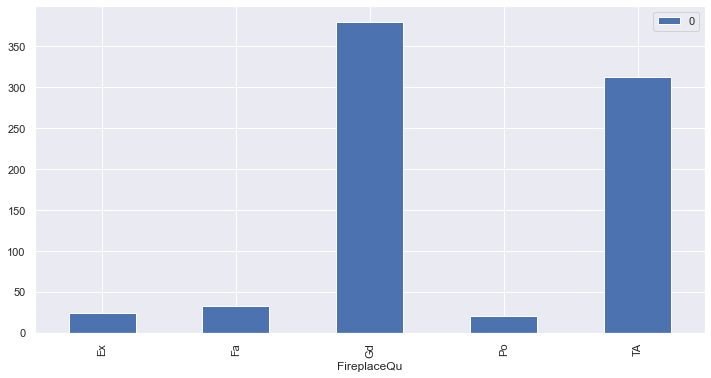

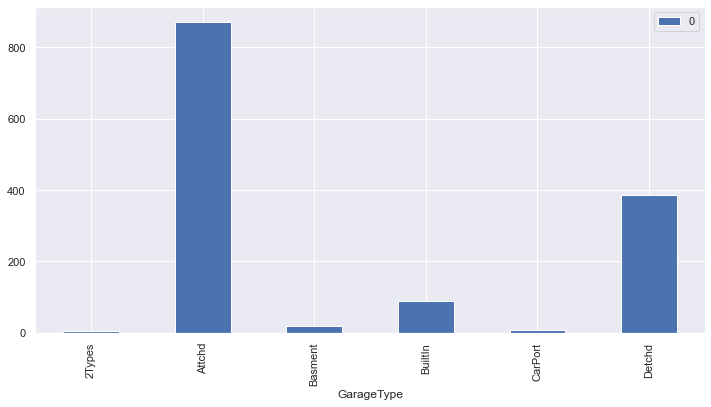

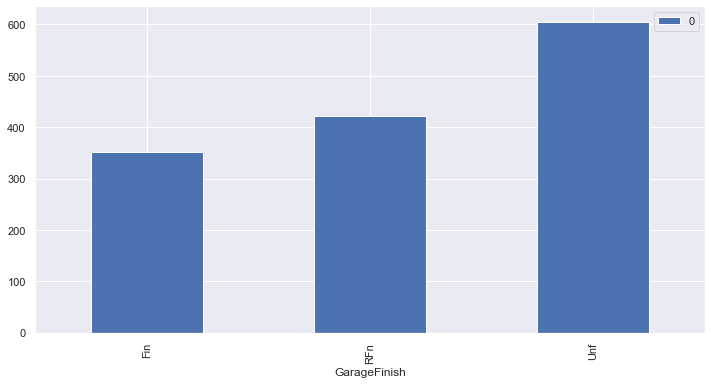

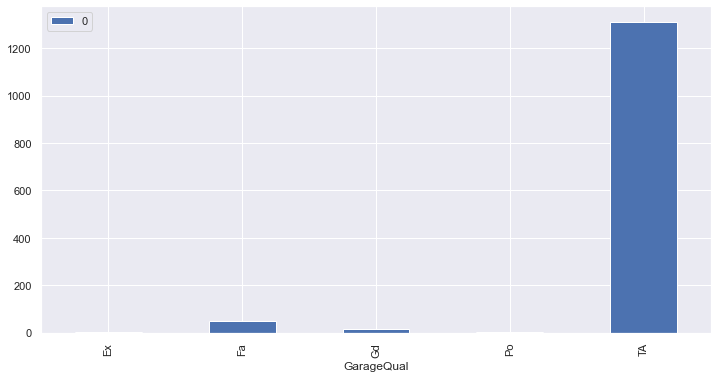

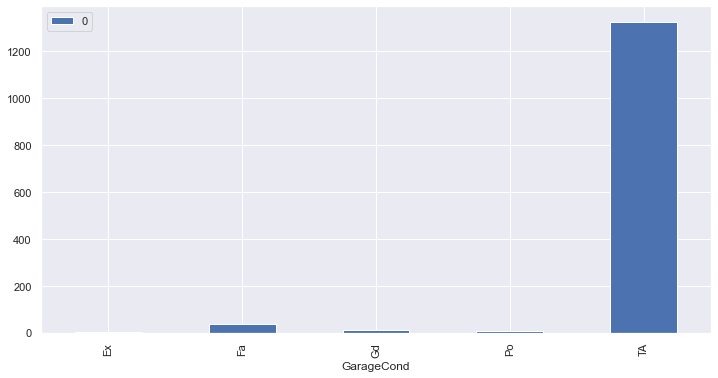

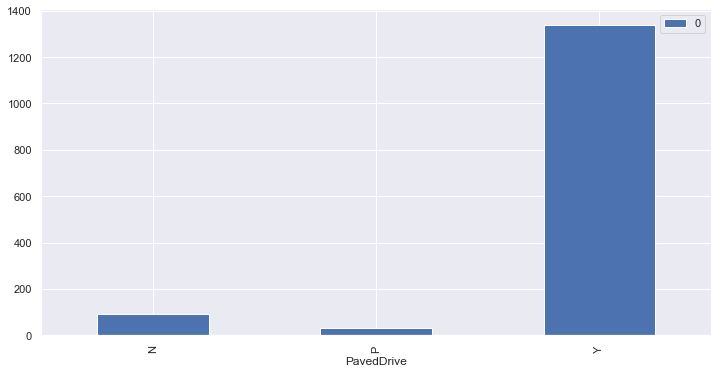

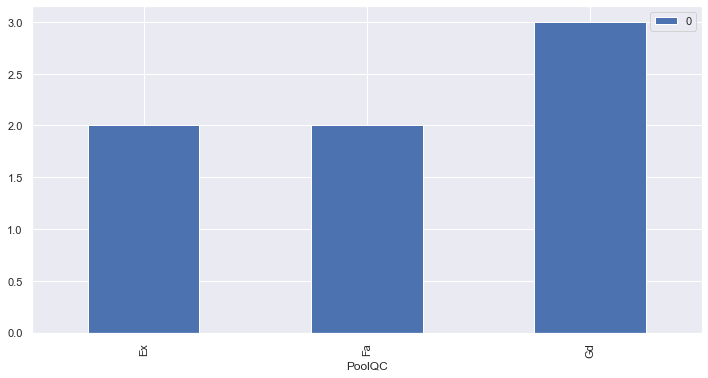

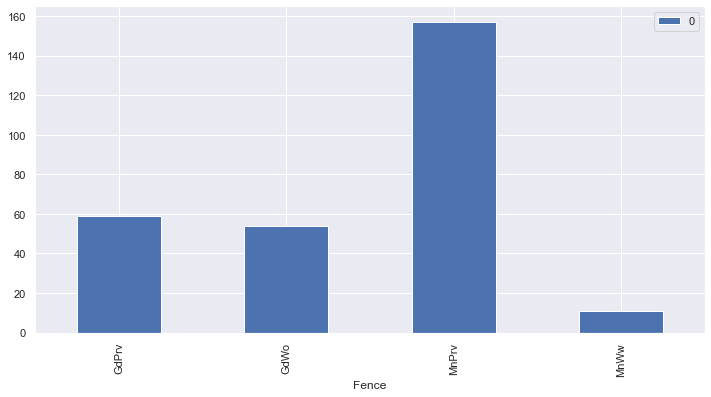

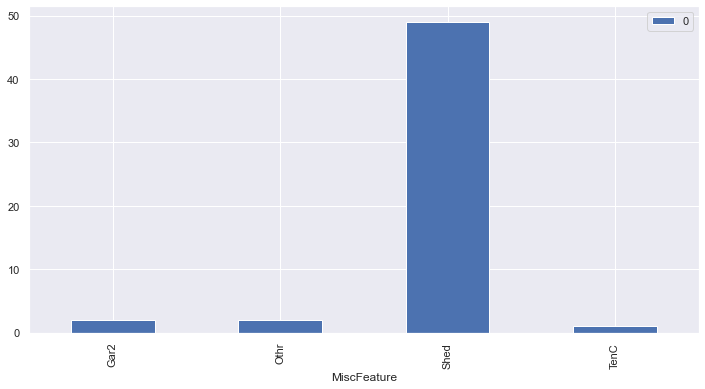

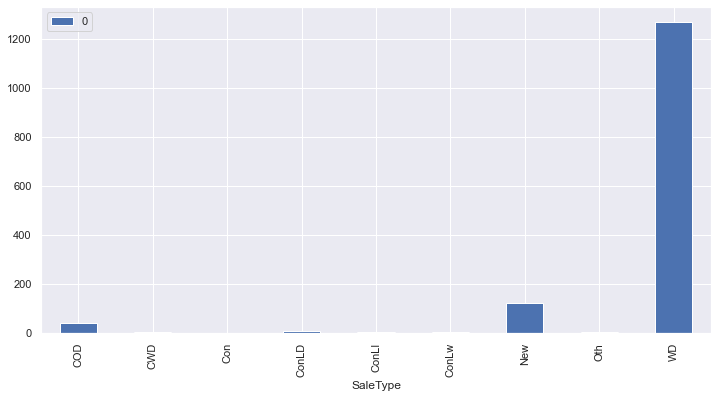

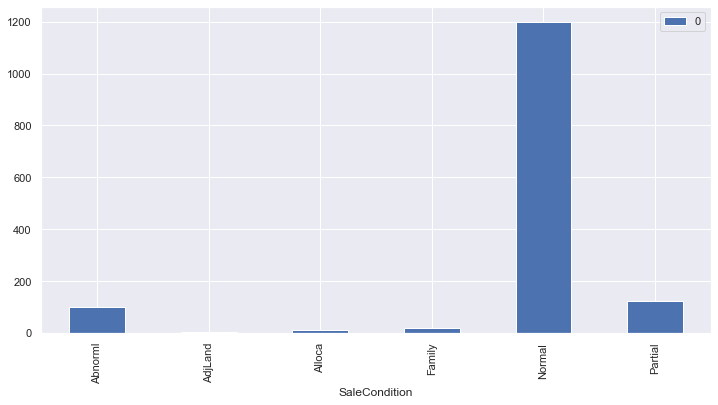

In [106]:
showBar(categorical)